* Aşağıdaki kod kırmızı ile uyarı yazılarını göstermemeye yarıyor.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Doğrusal Olmayan Regresyon Modelleri

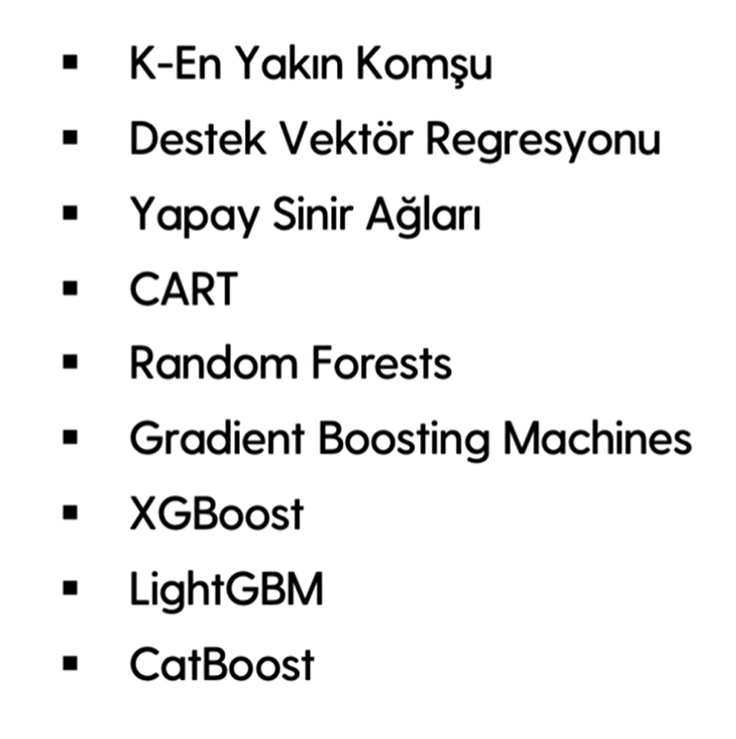

### K-En Yakın Komşu(KNN)

* Gözlemlerin birbirine olan benzerlikleri üzerinden tahmin yapılır.
* Sınıflandırma ya da regresyon problemlerinde kullanılabilen algoritmadır.
* 
Parametrik olmayan bir öğrenme türüdür.

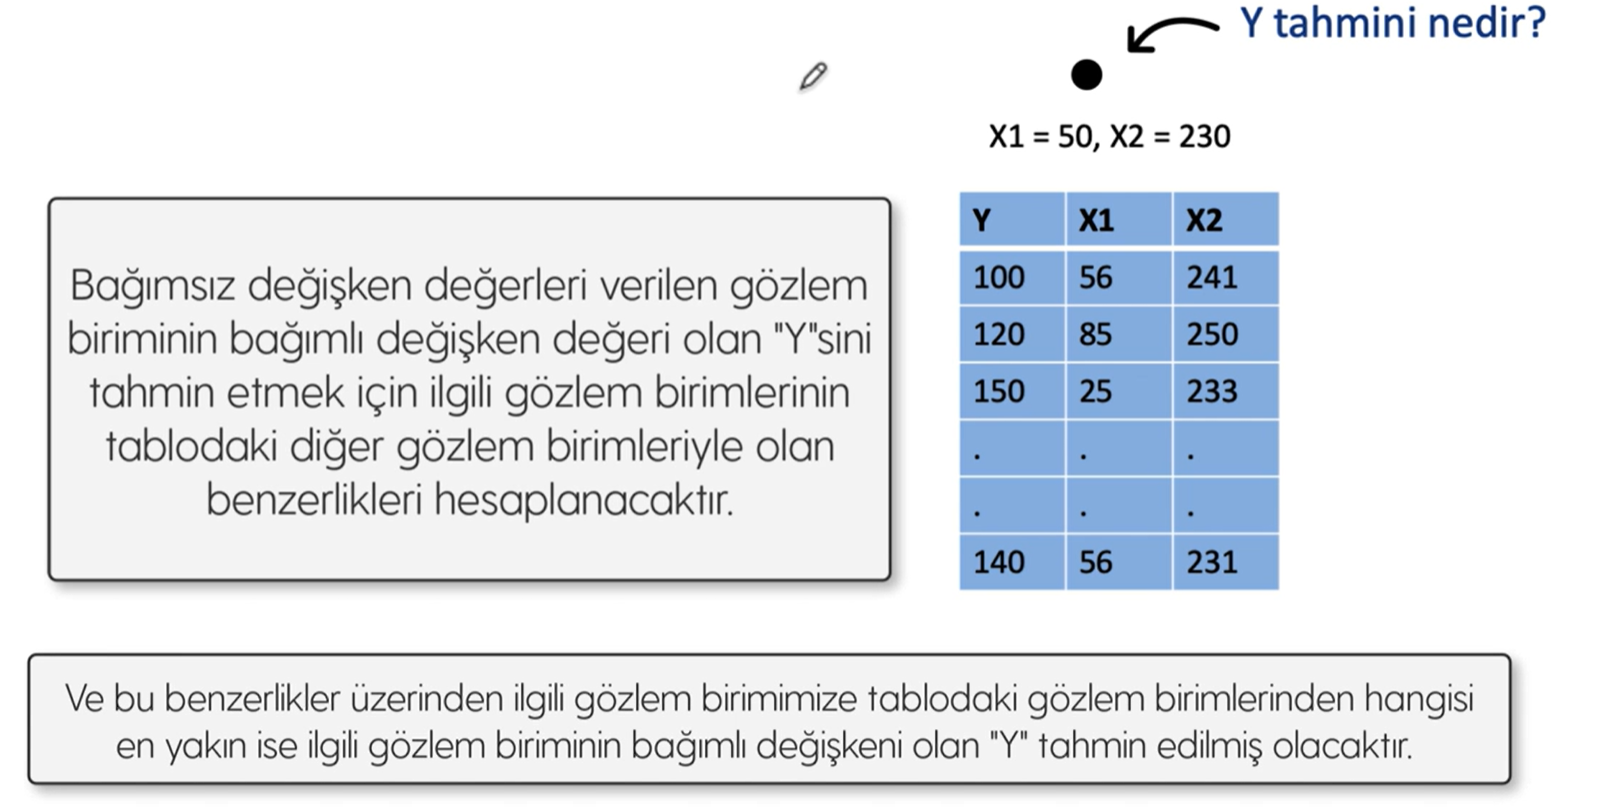

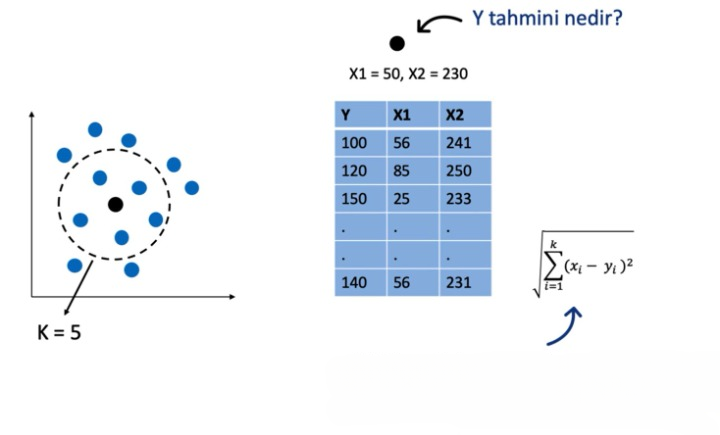

* Öklid ya da benzeri bir uzaklık hesabı ile 
her bir gözleme uzaklık hesaplanır.

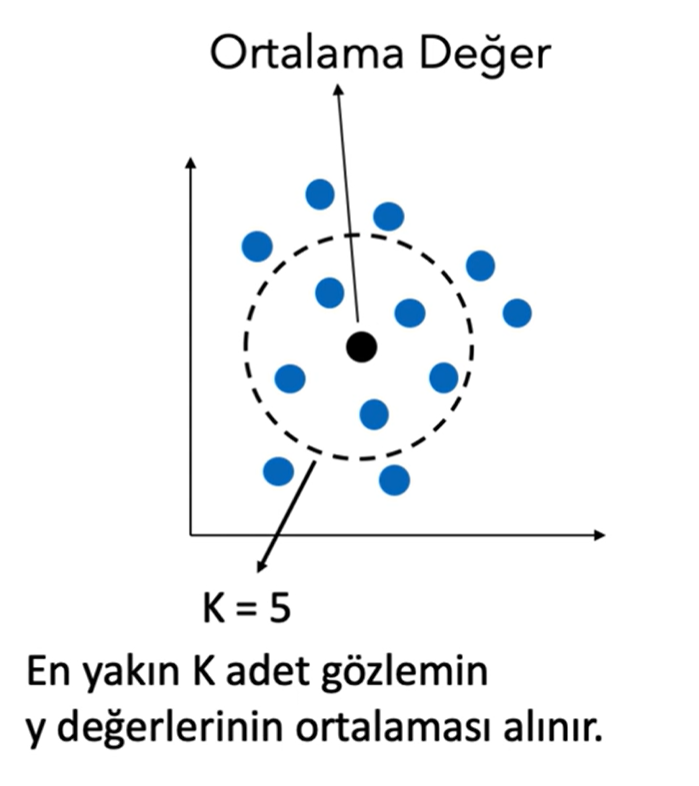

* KNN Basamakları
* Komşu sayısını belirle (K)* Bilinmeyen nokta ile diğer tüm noktalar ile  arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belirlenen k sayına göre en yakın olan k gözlemi seç.
* Sınıflandırma ise en sık sınıf, regresyon ise 
ortalama değeri tahmin değeri olarak ver.

### K En Yakın Komşu(KNN): Model, Tahmini ve Tuning

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [4]:
X_train.head()

AtBat   Hits  HmRun  Runs   RBI  Walks  Years  CAtBat   CHits  CHmRun  \
183  328.0   91.0   12.0  51.0  43.0   33.0    2.0   342.0    94.0    12.0   
229  514.0  144.0    0.0  67.0  54.0   79.0    9.0  4739.0  1169.0    13.0   
286  593.0  152.0   23.0  69.0  75.0   53.0    6.0  2765.0   686.0   133.0   
102  233.0   49.0    2.0  41.0  23.0   18.0    8.0  1350.0   336.0     7.0   
153  341.0   95.0    6.0  48.0  42.0   20.0   10.0  2964.0   808.0    81.0   

     CRuns   CRBI  CWalks  PutOuts  Assists  Errors  League_N  Division_W  \
183   51.0   44.0    33.0    145.0     59.0     8.0      True       False   
229  583.0  374.0   528.0    229.0    453.0    15.0      True       False   
286  369.0  384.0   321.0    315.0     10.0     6.0     False        True   
102  166.0  122.0   106.0    102.0    132.0    10.0     False       False   
153  379.0  428.0   221.0    158.0      4.0     5.0      True        True   

     NewLeague_N  
183         True  
229         True  
286        False  
102        False  
153         True

### Model

In [5]:
knnModel = KNeighborsRegressor().fit(X_train, y_train)

In [6]:
knnModel

KNeighborsRegressor()

In [7]:
knnModel.n_neighbors   # Komşu sayısı

5

In [8]:
knnModel.metric

'minkowski'

In [9]:
dir(knnModel)   # Knn modelinin içinden alınabilecek değerler verilir.

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_algorithm_metric',
 '_check_feature_names',
 '_check_n_features',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_X',
 '_fit_method',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_kneighbors_reduce_func',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_tree',
 '_validate_data',
 '_validate

### Tahmin

In [10]:
knnModel.predict(X_test)[0:5]

array([ 510.3334,  808.3334,  772.5   ,  125.5   , 1005.    ])

In [11]:
y_pred = knnModel.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

### Tuning

In [13]:
RMSE = []

for k in range(10):
    k = k + 1
    knnModel = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knnModel.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    RMSE.append(rmse)
    print("k = ", k, "için RMSE değeri: ", rmse)

k =  1 için RMSE değeri:  455.03925390751965
k =  2 için RMSE değeri:  415.99629571490965
k =  3 için RMSE değeri:  420.6765370082348
k =  4 için RMSE değeri:  428.8564674588792
k =  5 için RMSE değeri:  426.6570764525201
k =  6 için RMSE değeri:  423.5071669008732
k =  7 için RMSE değeri:  414.9361222421057
k =  8 için RMSE değeri:  413.7094731463598
k =  9 için RMSE değeri:  417.84419990871265
k =  10 için RMSE değeri:  421.6252180741266


* GridSearchCV: Belirlemeye çalıştığımız hiperparametrelerin değerlerini belirlemek için kullanılan bir fonksiyondur. Birbirinden farklı ve fazla sayıda parametre olduğunda onları bir ızgara mantığıyla değerlendirip olası tüm parametre kordinasyonlarını değerlendirmek ve kıyaslama yapmak için kullanılan bir fonksiyondur. 

In [14]:
knnParams = {"n_neighbors": np.arange(1,30,1)}

In [15]:
knn = KNeighborsRegressor()

In [16]:
knnCVModel = GridSearchCV(knn, knnParams, cv = 10).fit(X_train, y_train)

In [17]:
knnCVModel.best_params_

{'n_neighbors': 8}

In [18]:
# final model
knnTuned = KNeighborsRegressor(n_neighbors = knnCVModel.best_params_["n_neighbors"]).fit(X_train, y_train)

In [19]:
y_pred = knnTuned.predict(X_test)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

413.7094731463598

### Destek Vektör Regresyonu(Support Vector Regression)

* Güçlü ve esnek modelleme tekniklerinden birisidir.
* 
Sınıflandırma ve regresyon için kullanılabilir
* 
Robust (dayanıklı) bir regresyon modelleme tekniğidi
* Amaç, bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek 
şekilde doğru ya da eğriyi belirlemektir.r.

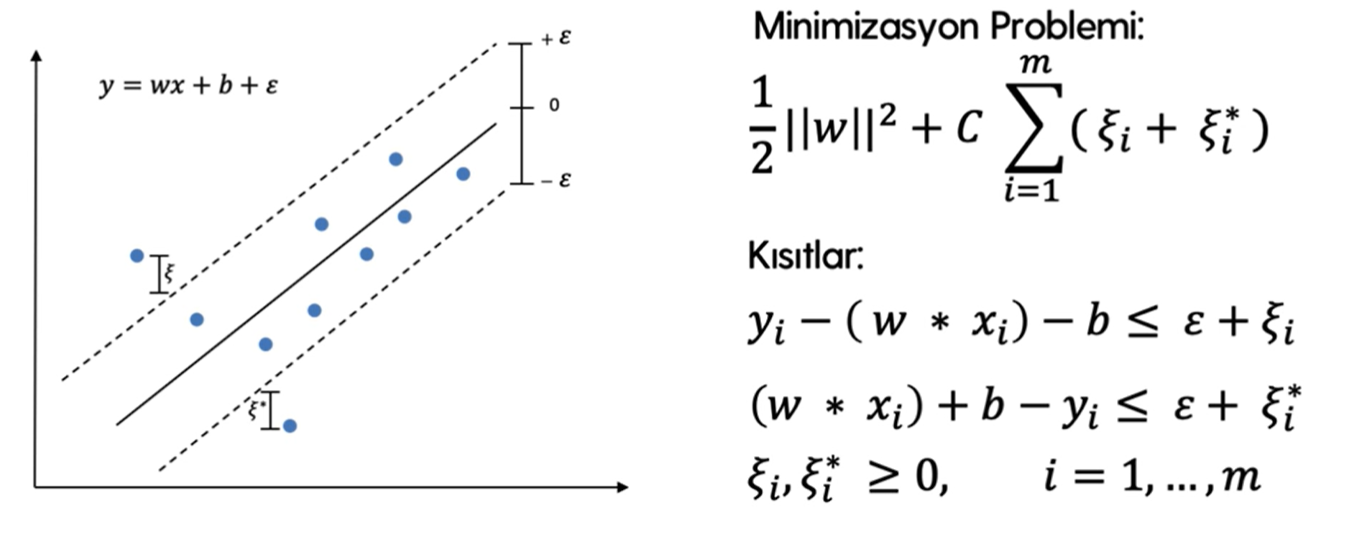

In [21]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

### Model & Tahmin

In [22]:
svrModel = SVR(kernel="linear").fit(X_train, y_train)  # Burda linear(doğrusal) kullandık. 

In [23]:
svrModel

SVR(kernel='linear')

In [24]:
svrModel.predict(X_train)[0:5]

array([219.32622627, 702.43039317, 623.20559641, 153.77538484,
       463.15191157])

In [25]:
svrModel.predict(X_test)[0:5]

array([679.14754919, 633.72883529, 925.68639938, 270.28464317,
       530.26659421])

In [26]:
svrModel.intercept_

array([-80.15196063])

In [27]:
svrModel.coef_

array([[ -1.2183904 ,   6.09602978,  -3.67574533,   0.14217072,
          0.51435925,   1.28388992,  12.55922527,  -0.08693754,
          0.46597185,   2.98259931,   0.52944513,  -0.79820793,
         -0.16015531,   0.30872795,   0.28842348,  -1.79560066,
          6.41868986, -10.74313785,   1.33374319]])

In [28]:
# İlkel Test Hatası
y_pred = svrModel.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

370.0408415795005

### Tuning

In [29]:
svrModel = SVR(kernel = "linear")

In [30]:
svrParams = {"C": [0.1, 0.5, 1, 3]}  # C = Ceza parametreleri

In [31]:
svrCVModel = GridSearchCV(svrModel, svrParams, cv = 5).fit(X_train, y_train)

* Yukarıda CV değerinin 5 olma nedeni: Aranacak olan parametre sayısı arttıkça k katlı çapraz doğrulamada denenecek olan bir çok parametre ortaya çıkmaktadır. Eğer yukarıda 5 yerine 10 değerini yazsaydık 10-15 dk sonuç döndürmesini beklerdik. Bu yüzden kısa sürmesi için 5 değerini yazdık. 

In [32]:
svrCVModel.best_params_

{'C': 0.5}

In [33]:
svrCVModel = GridSearchCV(svrModel, svrParams, cv = 5, verbose = 2,  n_jobs = -1).fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


* GridSearchCV metodunda "verbose" argümanı çalışma esansındaki durumu raporlamaya yarar.
* "n_jobs = -1" argümanında ise bilgisayarımızda varolan işlemci gücünün maksimum performans ile çalışmasını sağlar.

In [34]:
svrCVModel.best_params_

{'C': 0.5}

In [35]:
# Final model
svrTuned = SVR(kernel = "linear", C = 0.5).fit(X_train, y_train)

In [36]:
y_pred = svrTuned.predict(X_test)

In [37]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.98747616655294

### Yapay Sinir Ağları

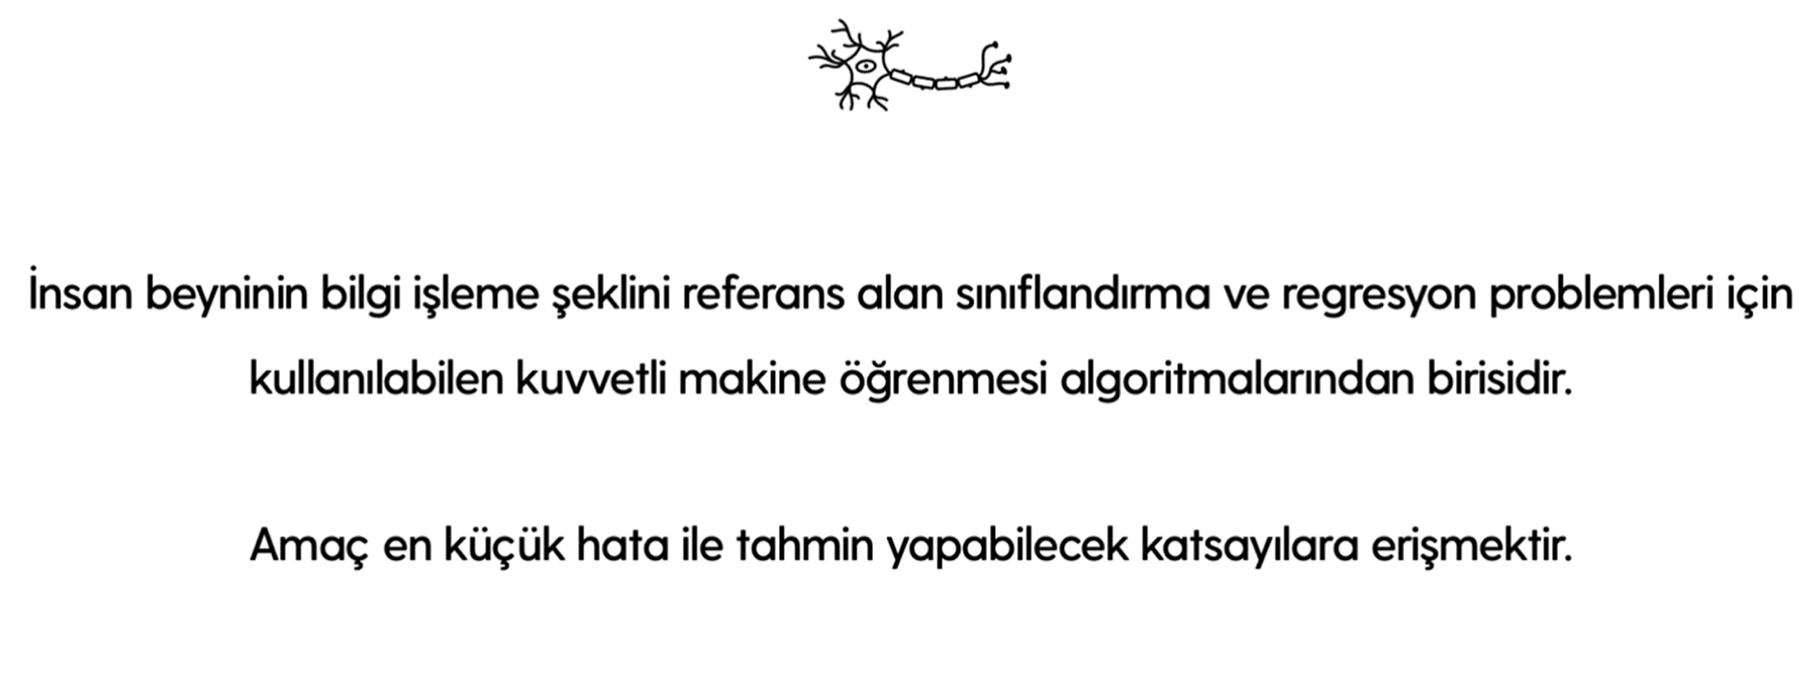

# Sinir Hücresi
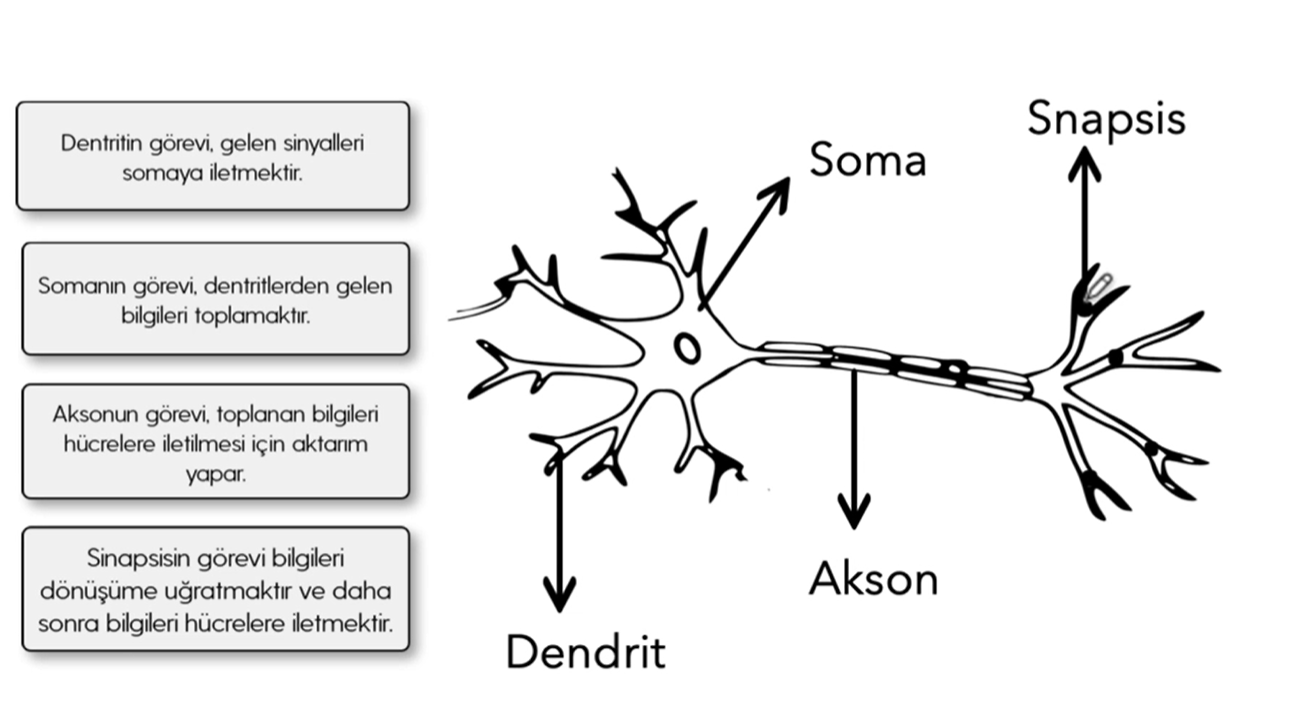

# Yapay Sinir Hücresi
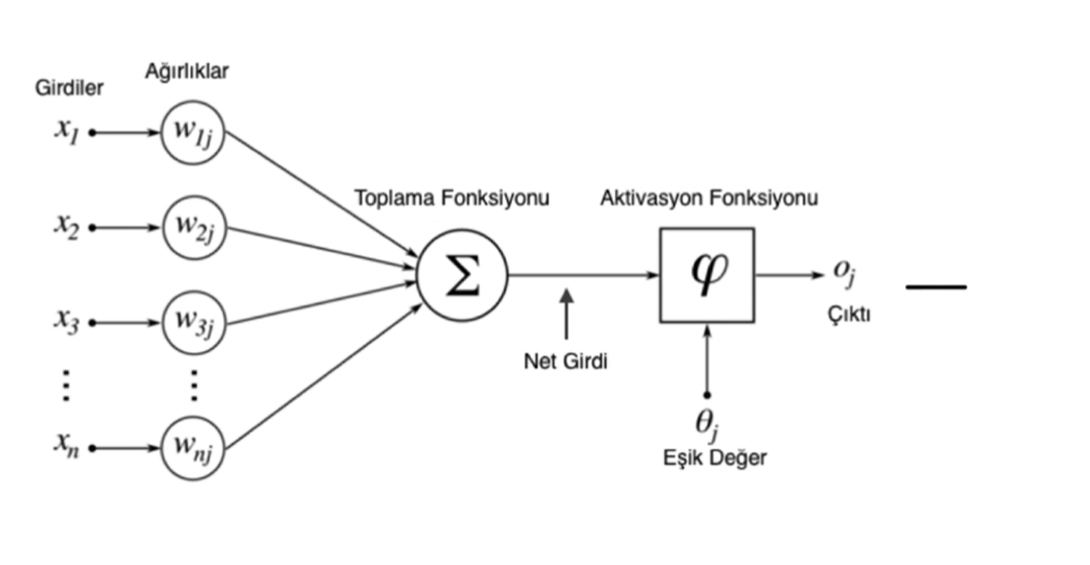

* Yapay Sinir Ağları birbiri ile ilişkilendirilmiş yapay sinir hücrelerinden oluşur. Bu ağı oluşturan her birime nöron(sinir hücresi) adı verilir. Yapay sinir ağına "Çok Katmanlı Algılayıcı" da denir.
* Çok katmanlı algılayıcılar içerisinde en sık kullanılanı "Geriye Yayılımlı Ağlar"dır. Bu ağlarda öğrenme kuralı olarak "Delta Öğrenme Kuralı" kullanılır.
* Delta Öğrenme Kuralı: Kabul edilebilir bir hata miktarı elde edilinceye kadar A çıktısı ile gerçek çıktı arasındaki farklar minimilize edilmeye çalışılır. Bu farkları minimize edebilmek adına girdilerin ağırlıkları değiştirilir. Bu değiştirme işlemlerine teknik olarak "Ağ Öğreniyor" adı verilir. Yani kat sayılar değiştikçe ağın öğrendiği yorumu yapılır.

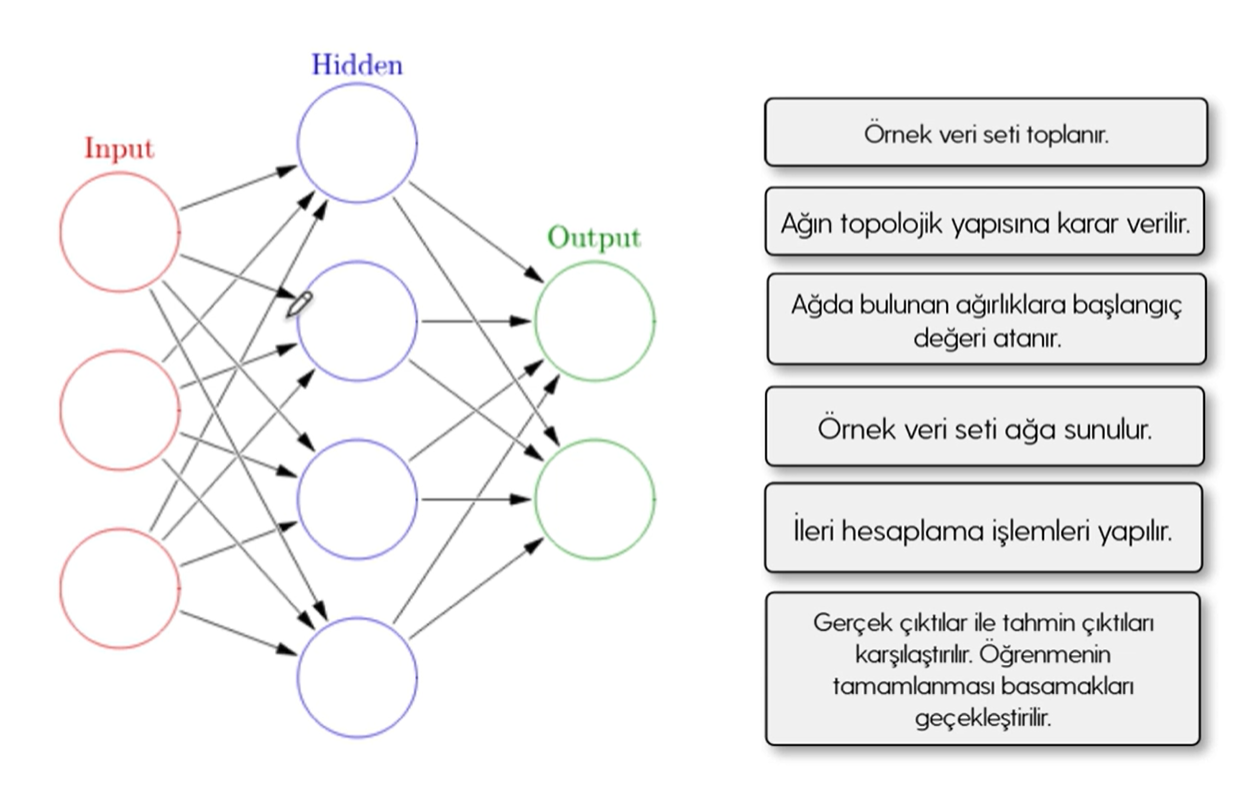

# Yapay Sinir Ağı Matematiksel Formülü
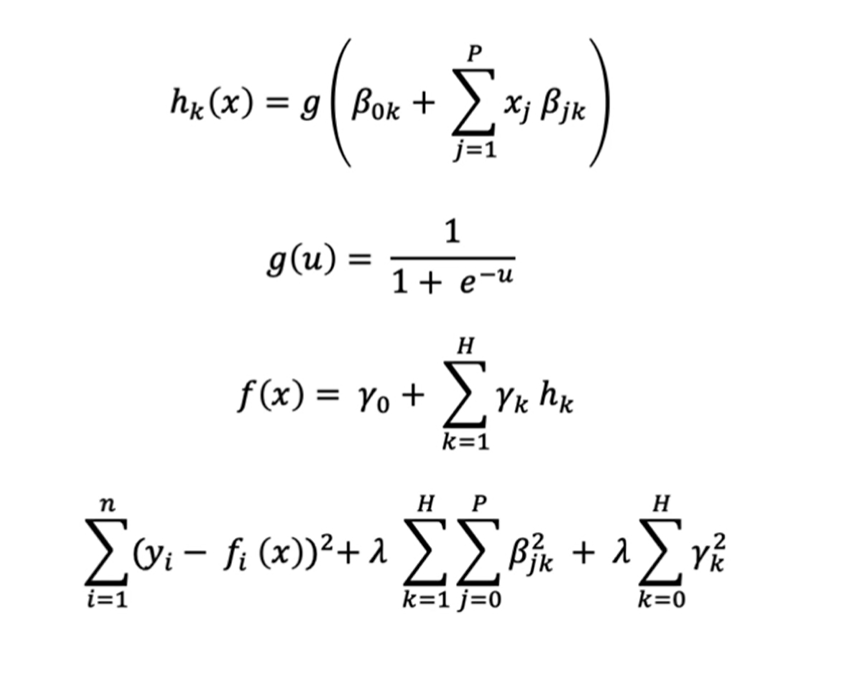

### Yapay Sinir Ağları Model ve Tahmin

In [38]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

* Yapay sinir ağları homojen veri setleri üzerinde daha iyi çalışan bir algoritmadır. Çünkü hataların optimizasyonu noktasında yapılan türevleme işlemlerinde ortaya çıkmış olan aykırılıkların yani gerçek değerler ile tahmin değerleri arasında ciddi farklar oluşturan değerlerin ortaya çıkarabildiği bazı problemler söz konusudur. Bundan dolayı yapay sinir ağları standartlaştırma sonrasında kullanmak daha sağlıklı olmaktadır. 

In [39]:
scaler = StandardScaler()

In [40]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [41]:
X_test_scaled = scaler.transform(X_test)

In [42]:
mlpModel = MLPRegressor().fit(X_train_scaled, y_train)

In [43]:
mlpModel

MLPRegressor()

In [44]:
mlpModel.predict(X_test_scaled)[0:5]

array([22.91341493, 37.06390331, 72.31607617, 11.77305099, 22.58874514])

In [45]:
y_pred = mlpModel.predict(X_test_scaled)
np.sqrt(mean_squared_error(y_test, y_pred))

660.242873535378

### Model Tuning

In [46]:
mlpParams = {"alpha": [0.1, 0.01, 0.02, 0.001, 0.0001], 
            "hidden_layer_sizes": [(10,20), (5,5), (100,100)]}

* Yukarıda "alpha" değerimiz ceza parametresidir. İkinci tanımlanan parametre ise "hidden layer sizes(gizli katman sayısı)" da katmanları ifade etmek istediğimizde girdiğimiz değer kadar katman, ve girilen değer kadar da hücre oluşmuş oluyor. Mesela "(10,20)" burda iki sayı girdiğimiz için iki katmandan oluşacağını anlıyor. Ve bu katmanlardaki nöron sayılarını da bu değerlere bakıp belirliyor. 

In [47]:
mlpCVModel = GridSearchCV(mlpModel, mlpParams, cv = 10, verbose = 2, n_jobs = -1).fit(X_train_scaled, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


In [48]:
mlpCVModel.best_params_

{'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}

In [49]:
# FinalModel
mlpTuned = MLPRegressor(alpha = 0.0001, hidden_layer_sizes = (100,100)).fit(X_train_scaled, y_train)

In [50]:
y_pred = mlpTuned.predict(X_test_scaled)

In [51]:
np.sqrt(mean_squared_error(y_test, y_pred))

362.0647222181211

# Classification and Regression Tree (CART)

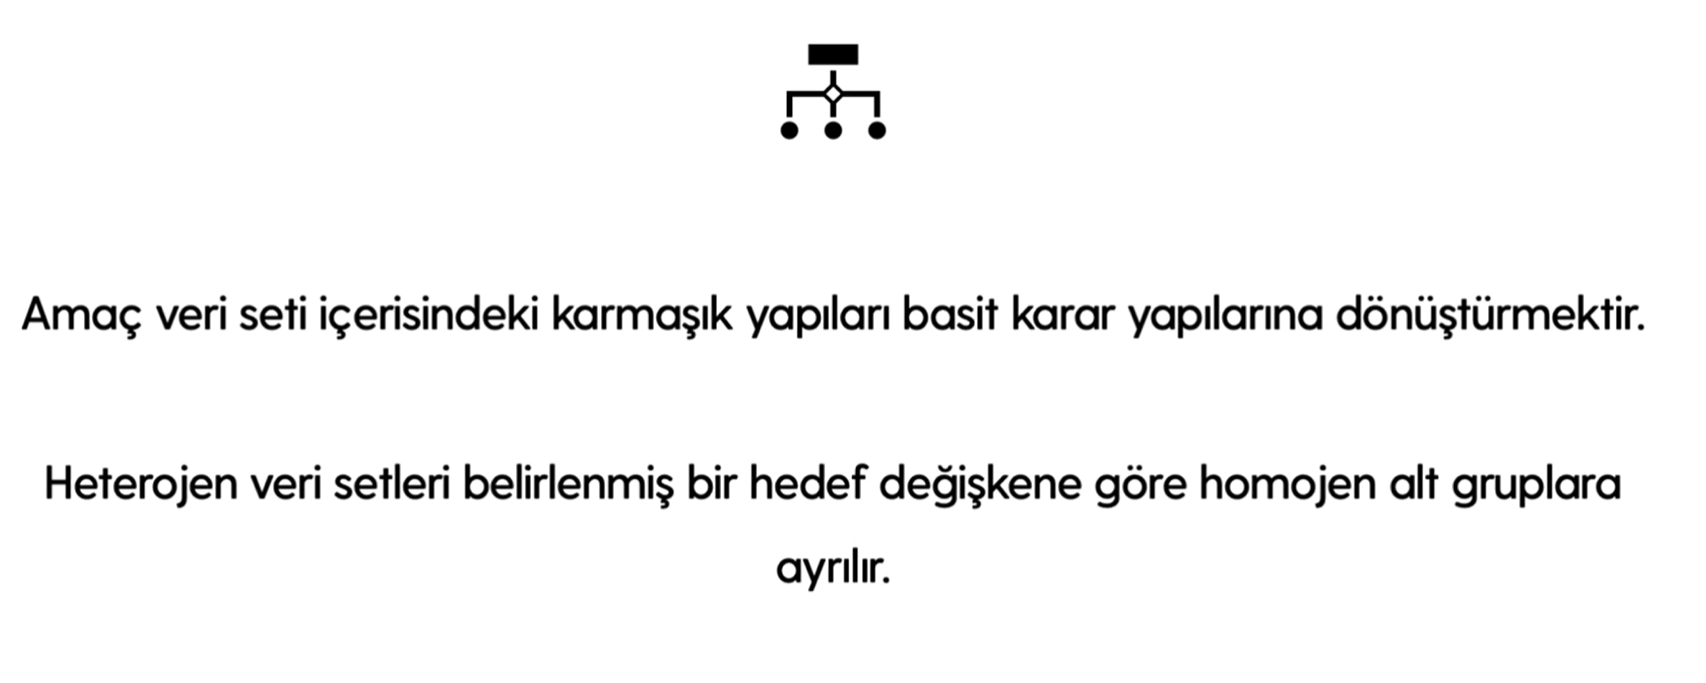

In [52]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [53]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

### CART Model ve Tahmin

In [54]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

* **"max_leaf_nodes"** bizim cart gibi ağaç modellerimizin içerisinde bulunana dallanma sayısını temsil etmektedir. Yani yukarı 10 değerini girmem sonucunda aşağıdaki plot içerisinde 5 adet lenf node'si oluşacaktır.

In [55]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

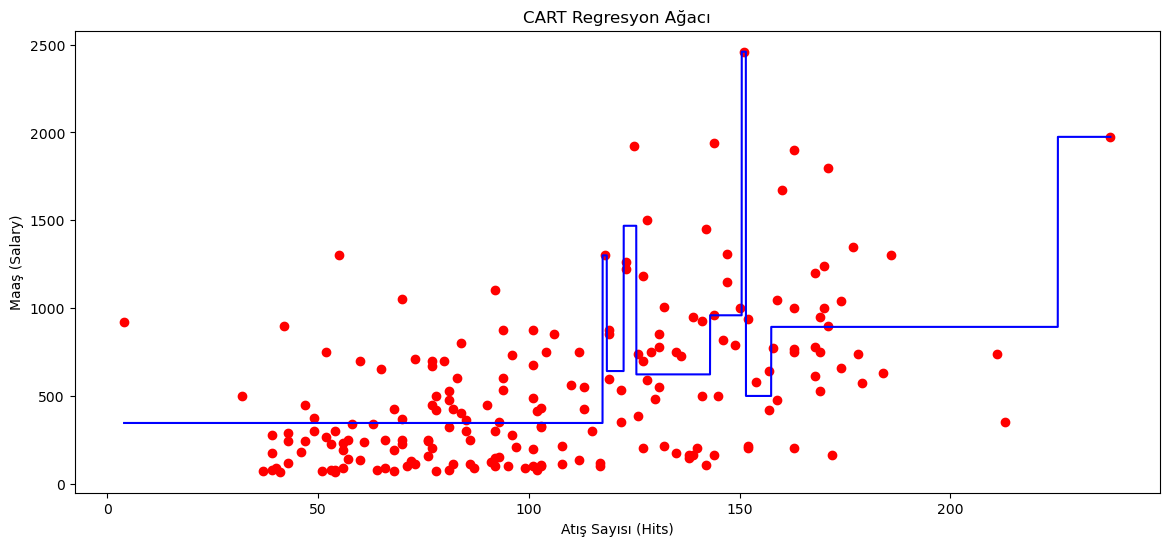

In [56]:
X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.figure(figsize=(14,6))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")

plt.title("CART Regresyon Ağacı")
plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş (Salary)")
plt.show()

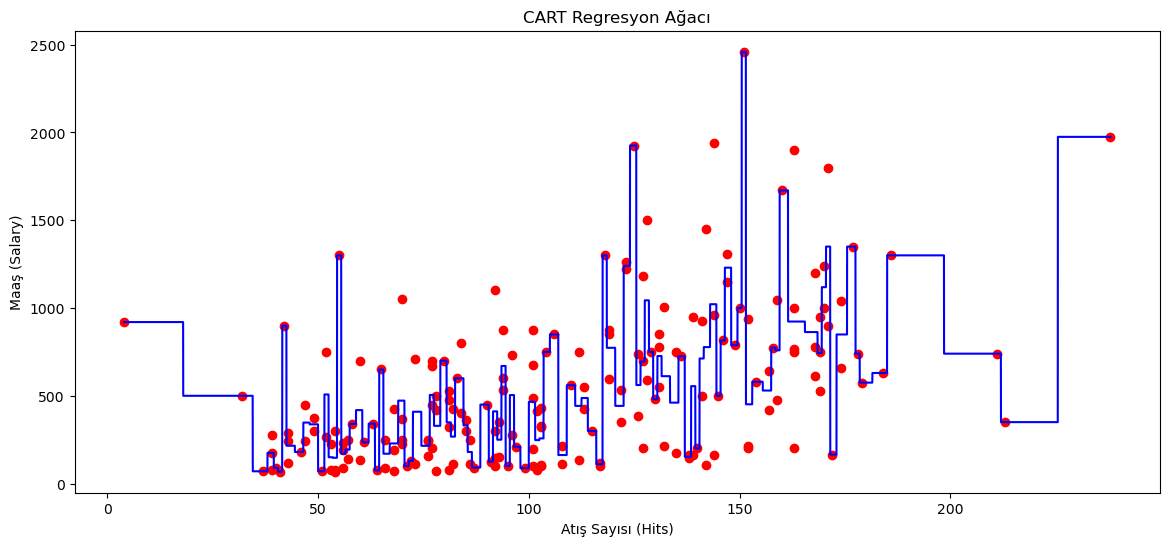

In [57]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)

X_grid = np.arange(min(np.array(X_train)), max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.figure(figsize=(14,6))
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_grid, cart_model.predict(X_grid), color = "blue")

plt.title("CART Regresyon Ağacı")
plt.xlabel("Atış Sayısı (Hits)")
plt.ylabel("Maaş (Salary)")
plt.show()

* Yukarıda ise node'leri kendi halinde bırakmış bulunmaktayız yani biz bir şartlandırma gerçekleştirmeden(parametre vermeden) kendi bildiği şekilde oluşturmuş oldu.

* Amacımız bölünmelerin çok olmasıdır. Çünkü bölünme ne kadar çok ise sonucumuz o kadar yüksek doğrulukta olacaktır.

### Tek değişkenli tahmin

In [58]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [59]:
y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

### Tüm değişkenler için tahmin

In [60]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [61]:
cart_model = DecisionTreeRegressor().fit(X_train, y_train)

y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

521.0471048952118

**Yukarıdaki sonuçlardan(486-460) çıkarılacak karar şu şekildedir: Seçmiş olduğumuz tek değişkenin oldukça yüksek açıklanabilirlik sağladığı ve yeni değişkenler ekledikçe daha başarılı tahminler yapılabileceğidir.**

### Model Tuning

In [62]:
cart_model

DecisionTreeRegressor()

In [63]:
cart_model = DecisionTreeRegressor(max_depth = 5).fit(X_train, y_train)

y_pred = cart_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

450.40026829306504

In [64]:
?cart_model

Type:        DecisionTreeRegressor
String form: DecisionTreeRegressor(max_depth=5)
File:        c:\users\asus\anaconda3\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss using the median of each terminal node, and "poisson" which
    uses reduction in the half mean Poisson deviance to find splits.

    .. versionadded:: 0.18
       Mea

* Tree Algoritmalarında kullanılan bazı parametreleri yukarıdaki gibi bakarak inceleyebiliriz..

In [65]:
cart_params = {"max_depth": [2, 3, 4, 5, 10, 20],
              "min_samples_split": [2, 10, 5, 30, 50, 100]}

In [66]:
cart_model = DecisionTreeRegressor()

In [67]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10).fit(X_train, y_train)

In [68]:
cart_cv_model.best_params_

{'max_depth': 4, 'min_samples_split': 50}

### Final Model

In [69]:
cart_tuned = DecisionTreeRegressor(max_depth = 4, min_samples_split = 50).fit(X_train, y_train)

In [70]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

361.0876906511434

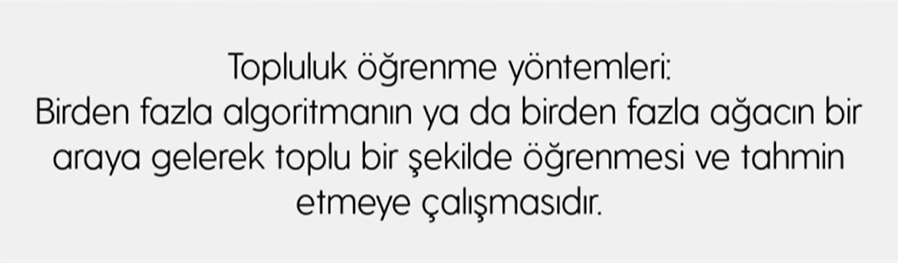

# Bagging
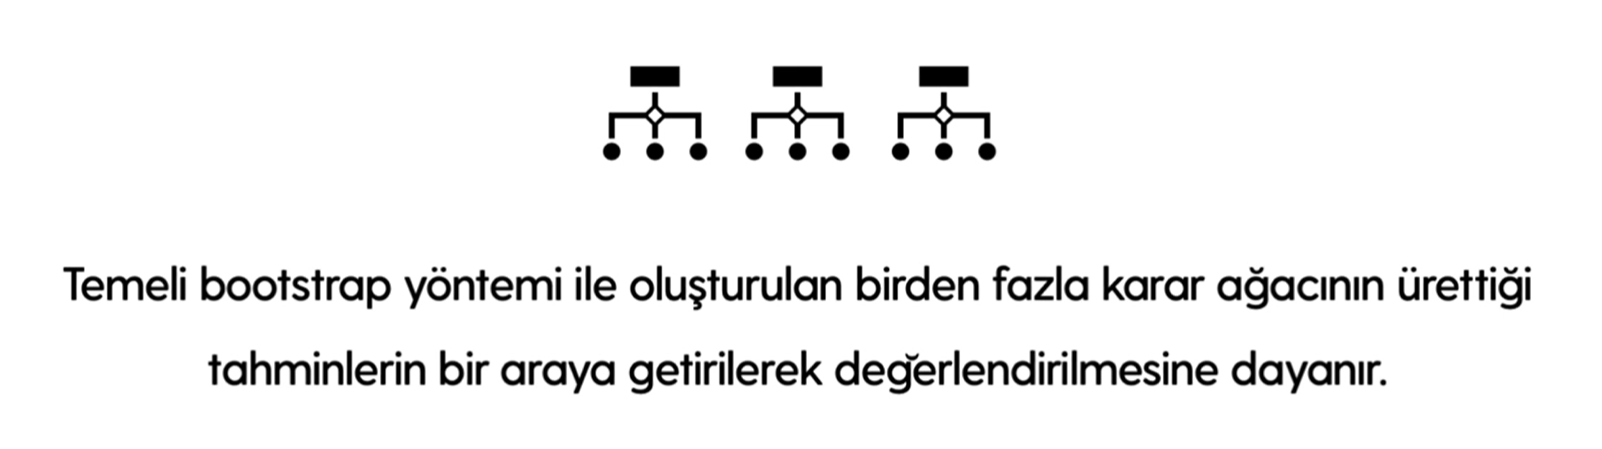

# Bagging Çalışma Prensibi
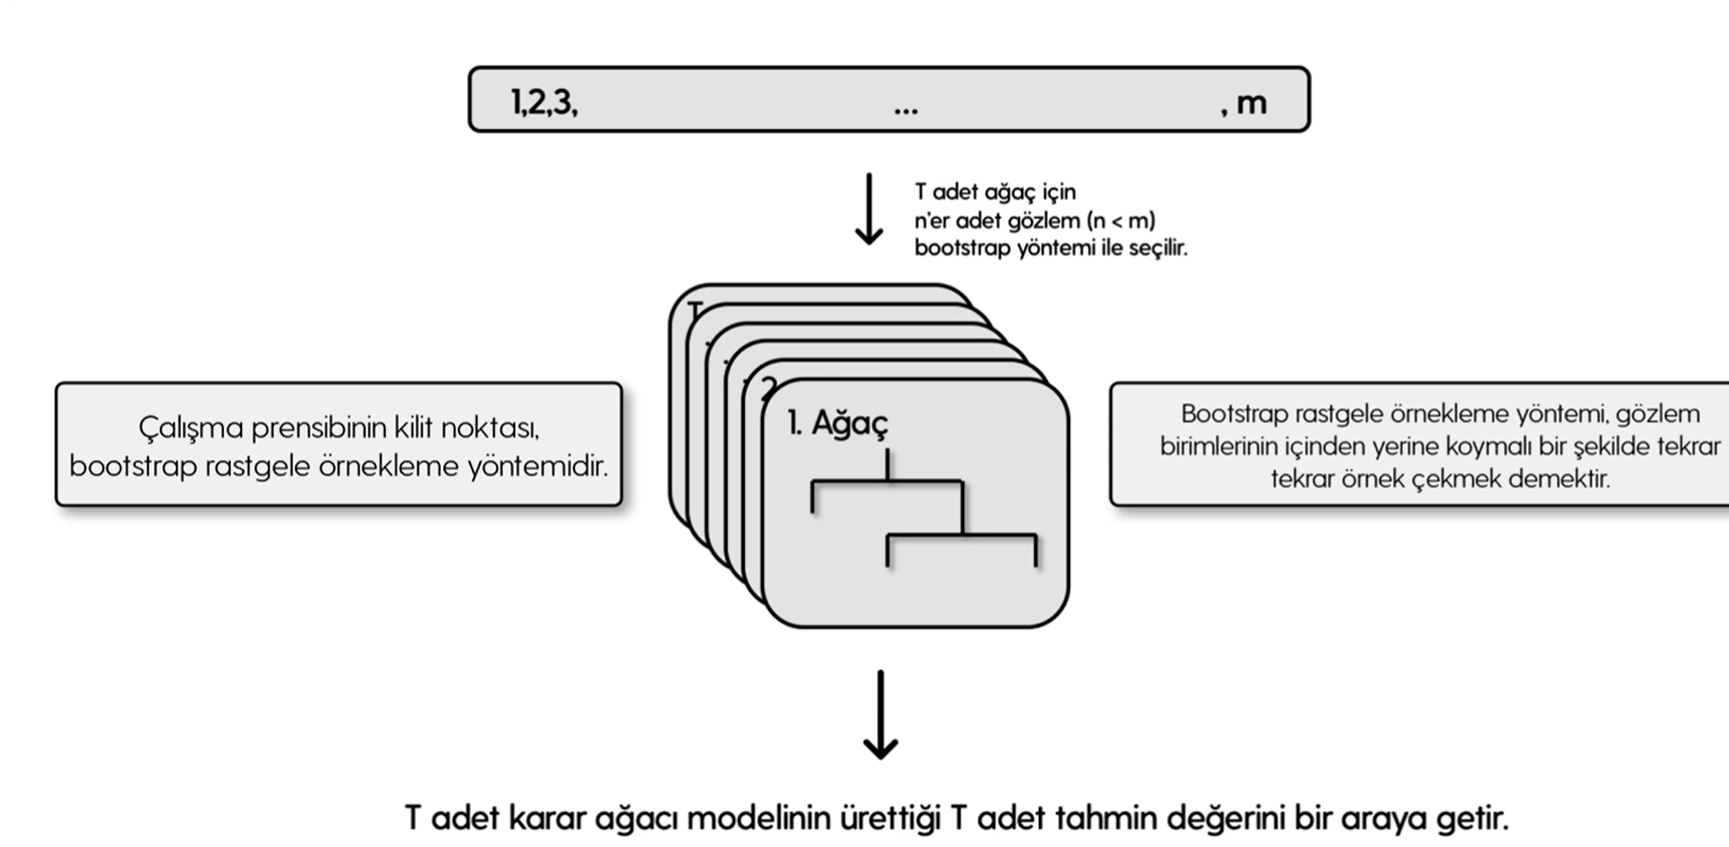

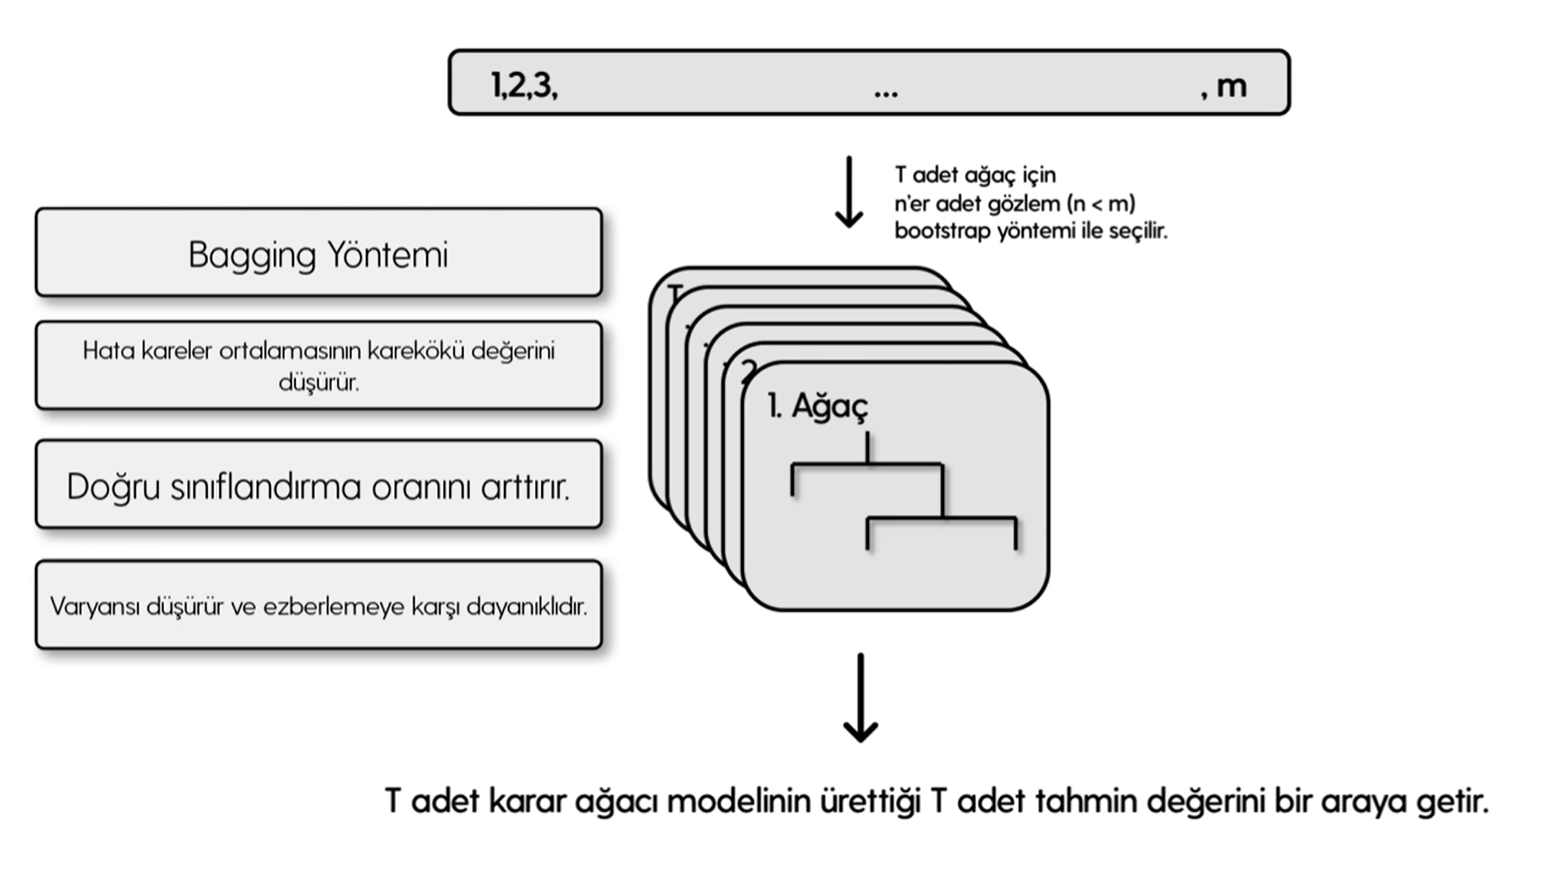

# Random Forest
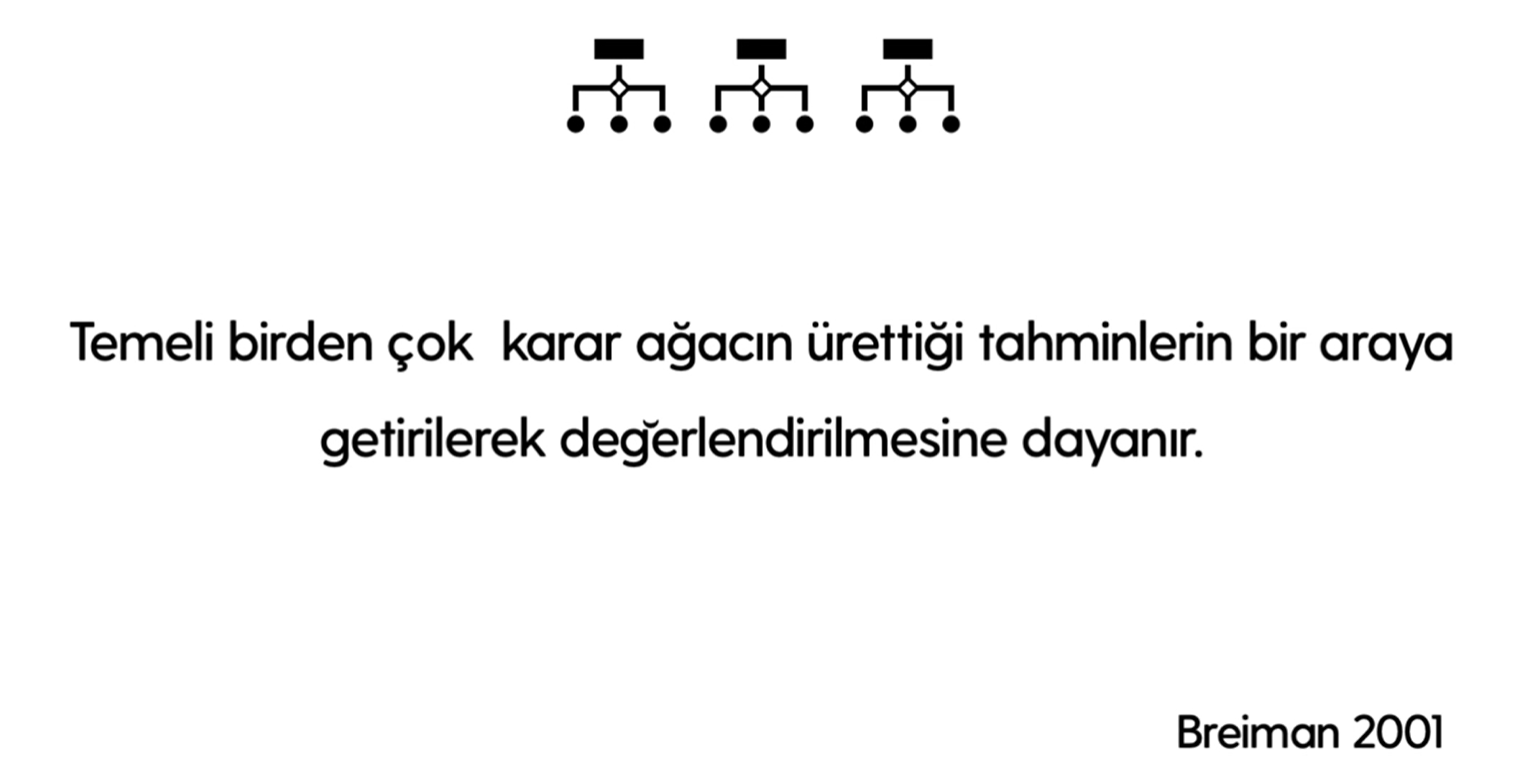

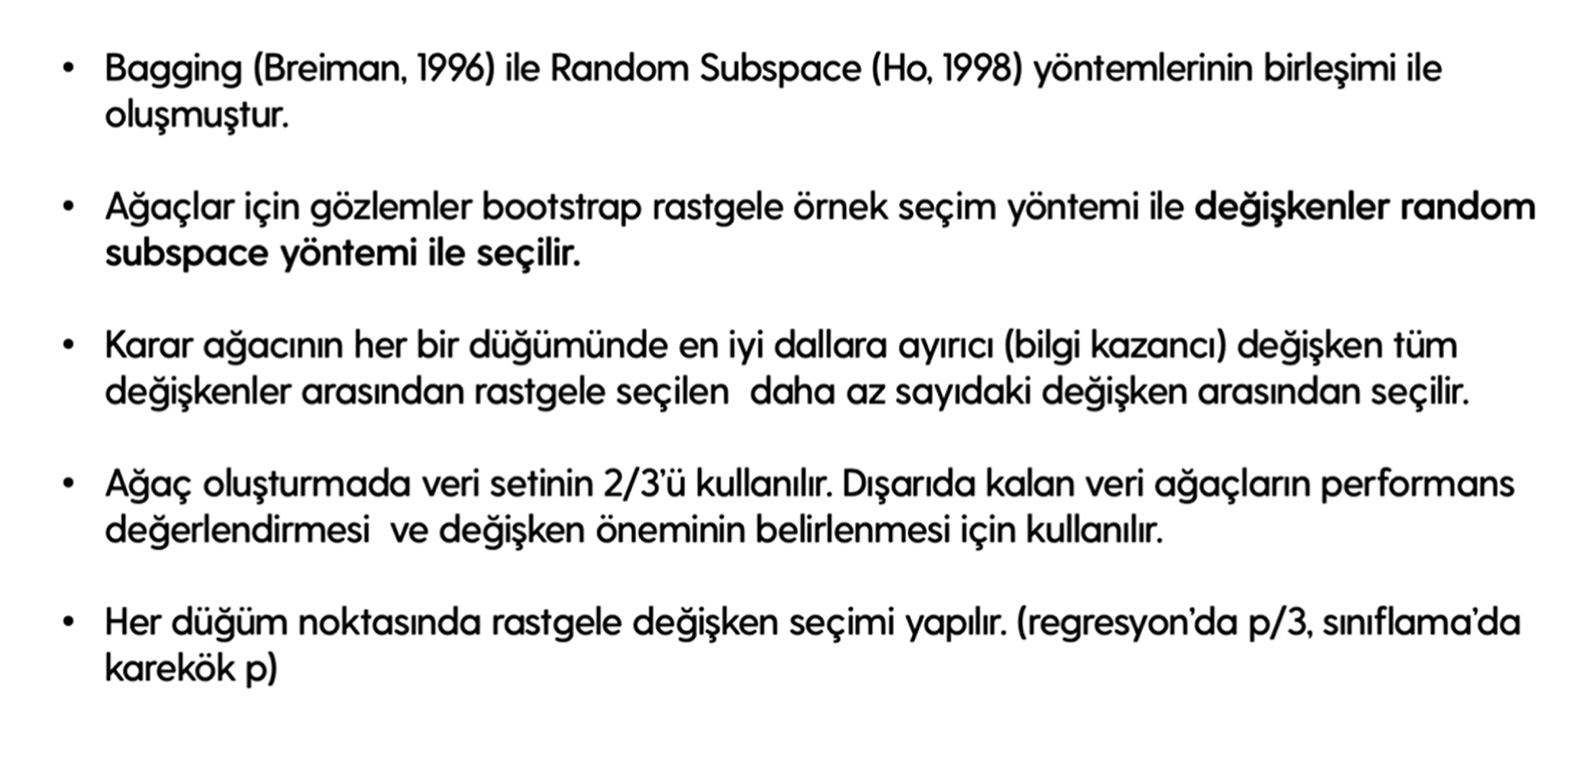

### Random Forests Model ve Tahmin

In [71]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [72]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [73]:
rf_model

RandomForestRegressor(random_state=42)

#### İlkel Hatamız

In [74]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

### Model Tuning

In [75]:
rf_params = {"max_depth": [5, 8, 10],
            "max_features": [2, 5, 10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2, 10, 80, 100]}

In [76]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


In [77]:
rf_cv_model.best_params_

{'max_depth': 8,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [78]:
rf_model = RandomForestRegressor(random_state = 42, 
                                 max_depth = 8, 
                                 max_features = 2, 
                                 min_samples_split = 2, 
                                 n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [79]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

349.1649379391149

### Değişken Önem Düzeyi

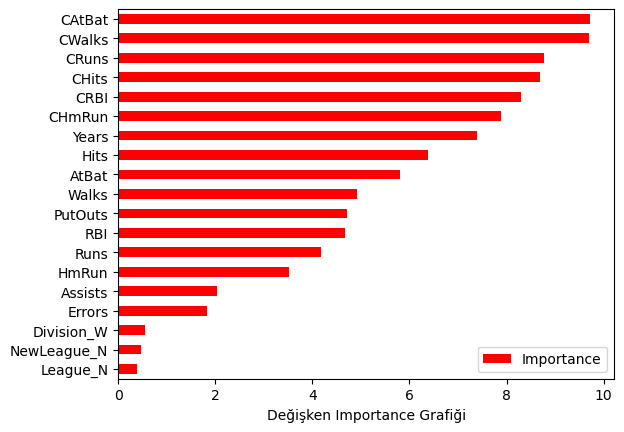

In [80]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, 
                         index = X_train.columns)

Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh", color = "red")
plt.xlabel("Değişken Importance Grafiği")
plt.show()

# Adaptive Boosting(AdaBoost)
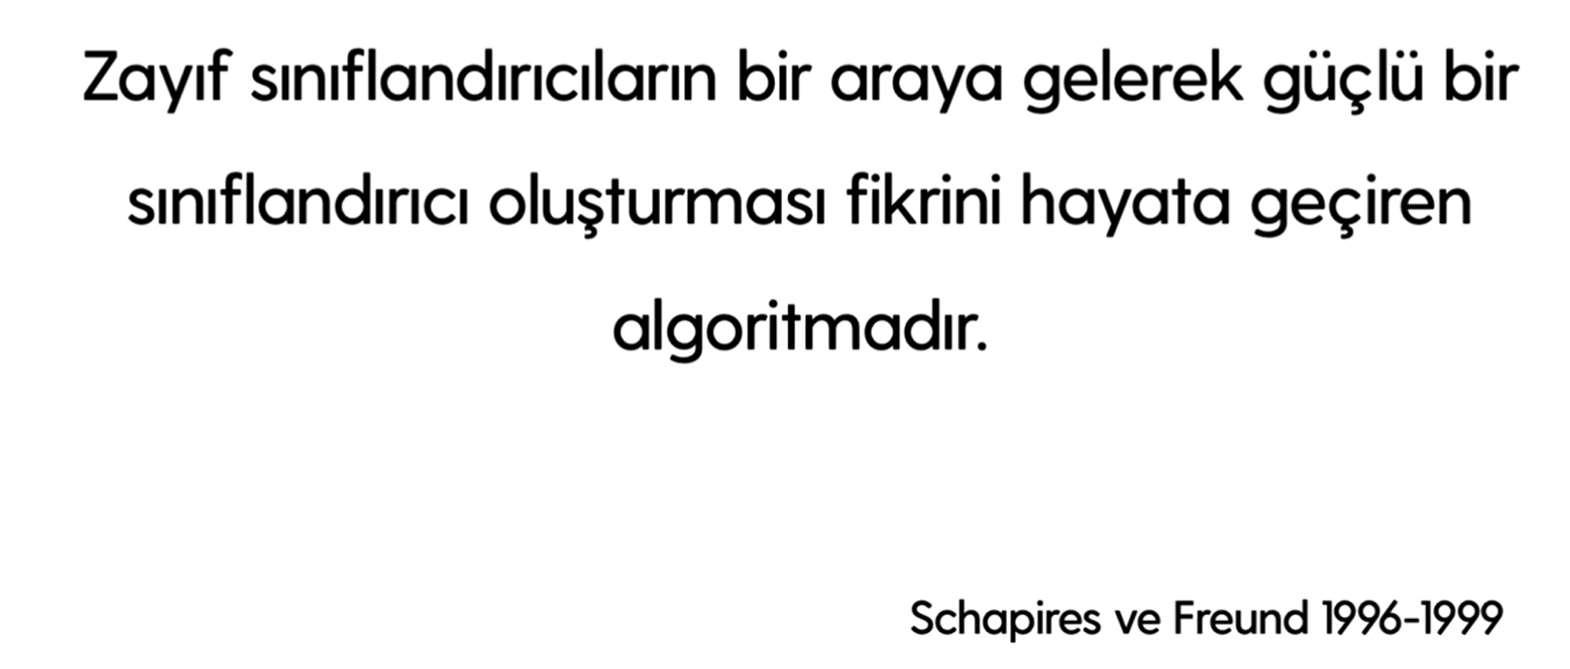

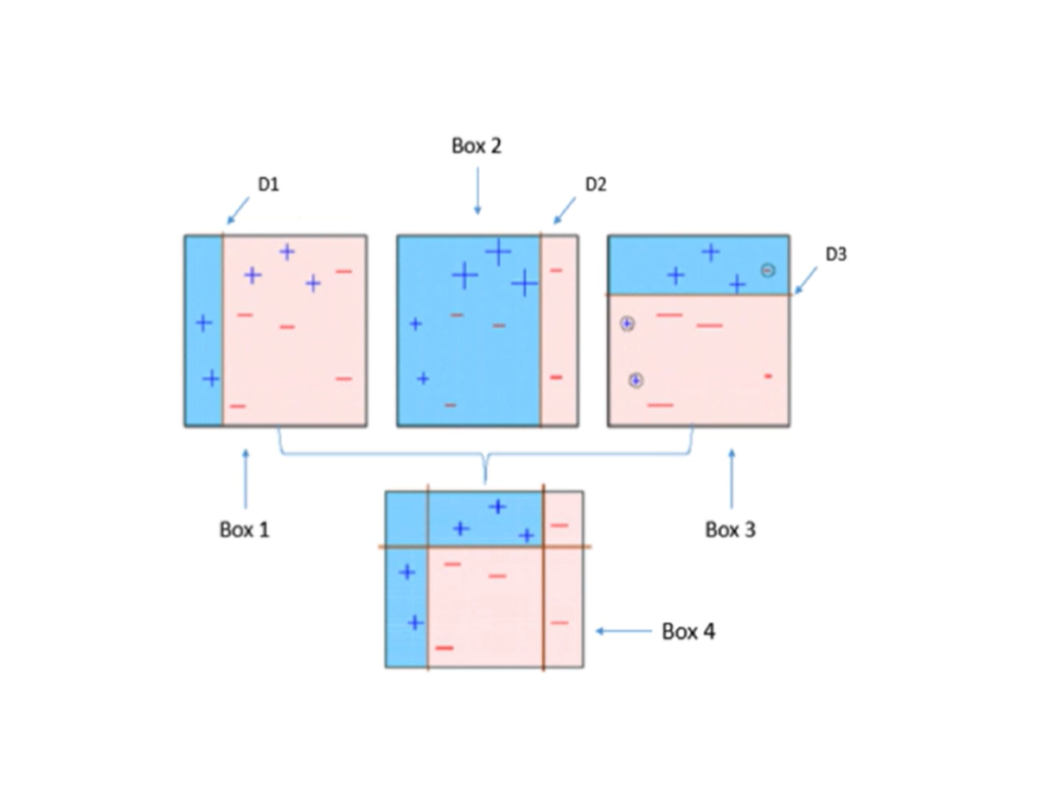

* Yukarıda belirtilen AdaBoost mantığı doğru yerleştirilmeyen noktaları baz alarak yeniden yerleştirme üzerine yani adaptive bir şekilde çalışabilen bir algoritmadır. Gradient Boosting ise AdaBoostun genelleştirilmiş bir versiyonudur denilebilir.

# Gradient Boosting Machines

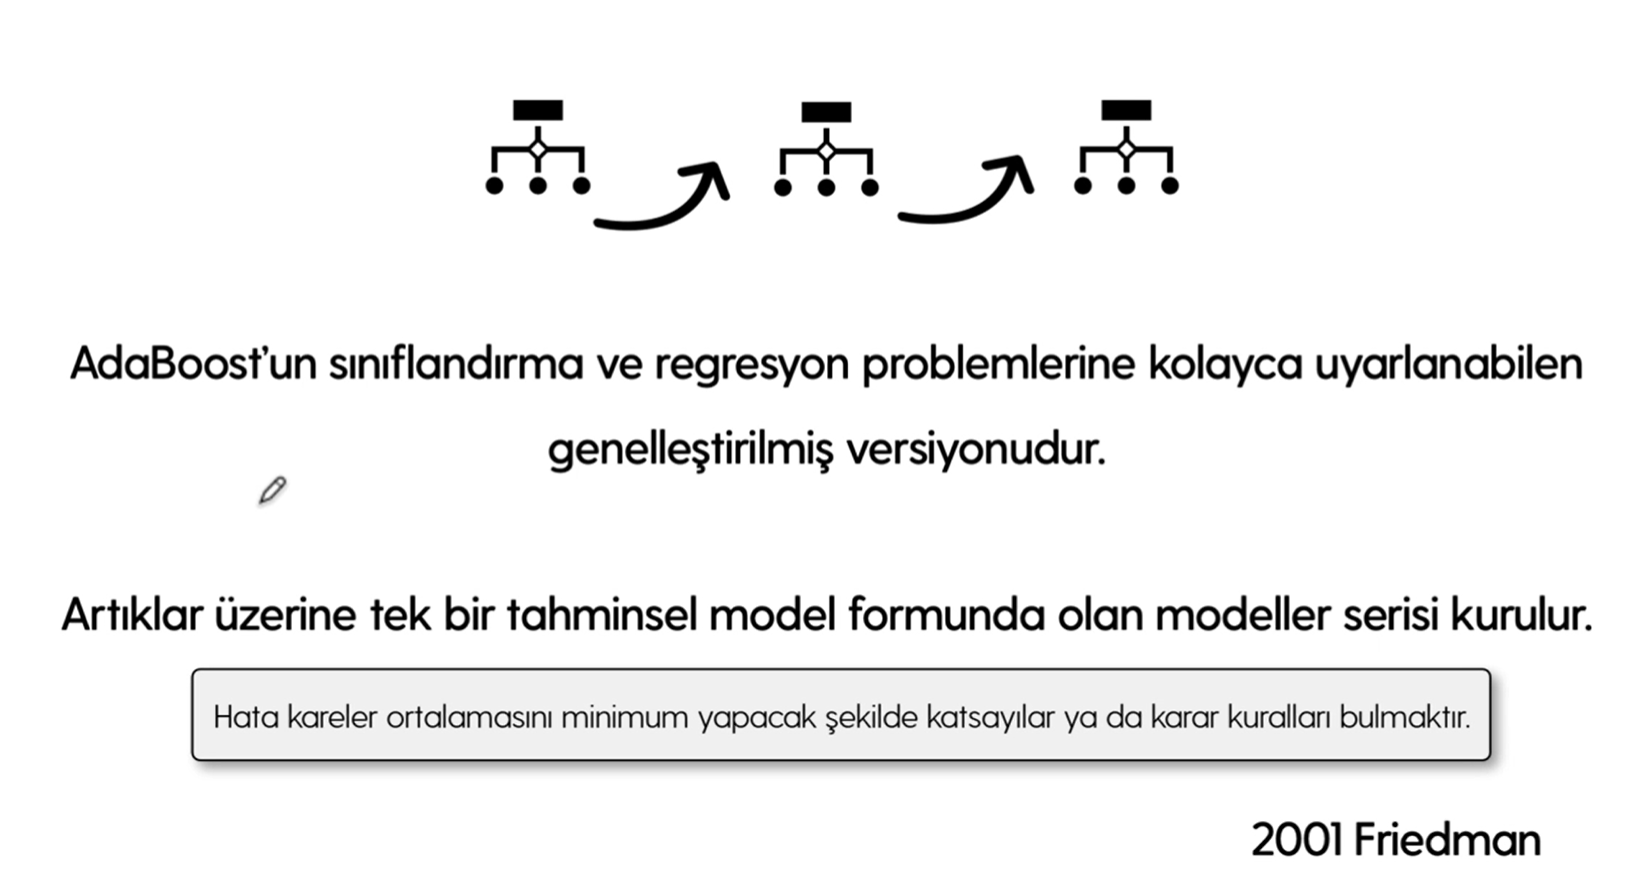

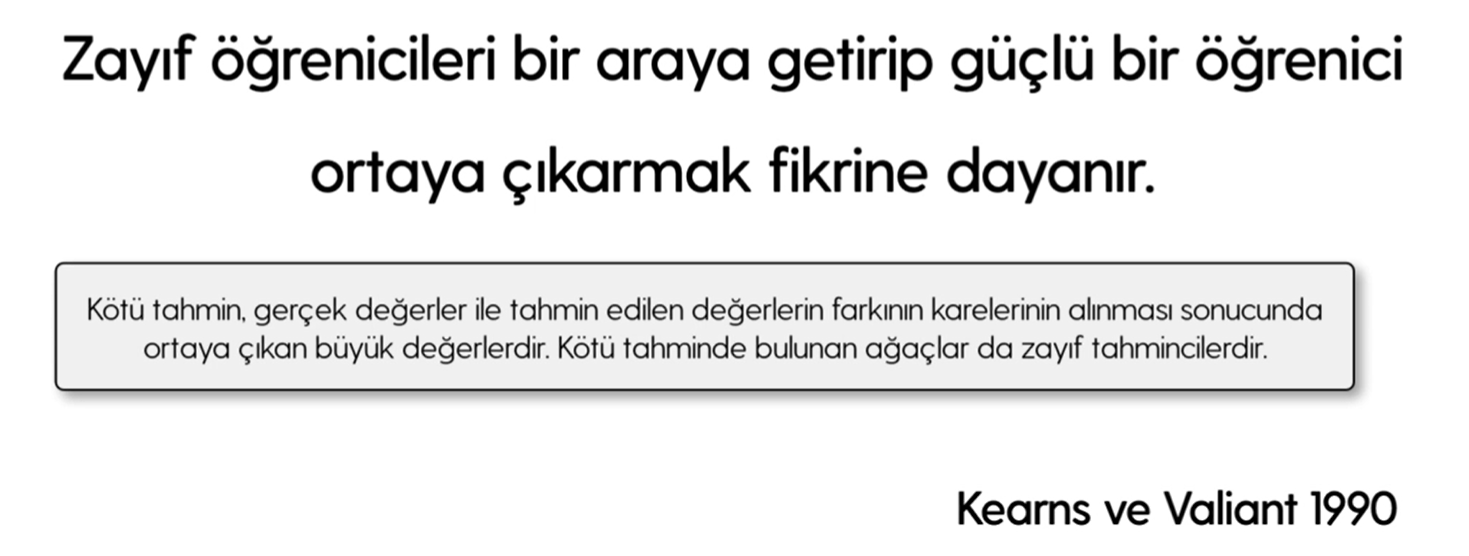

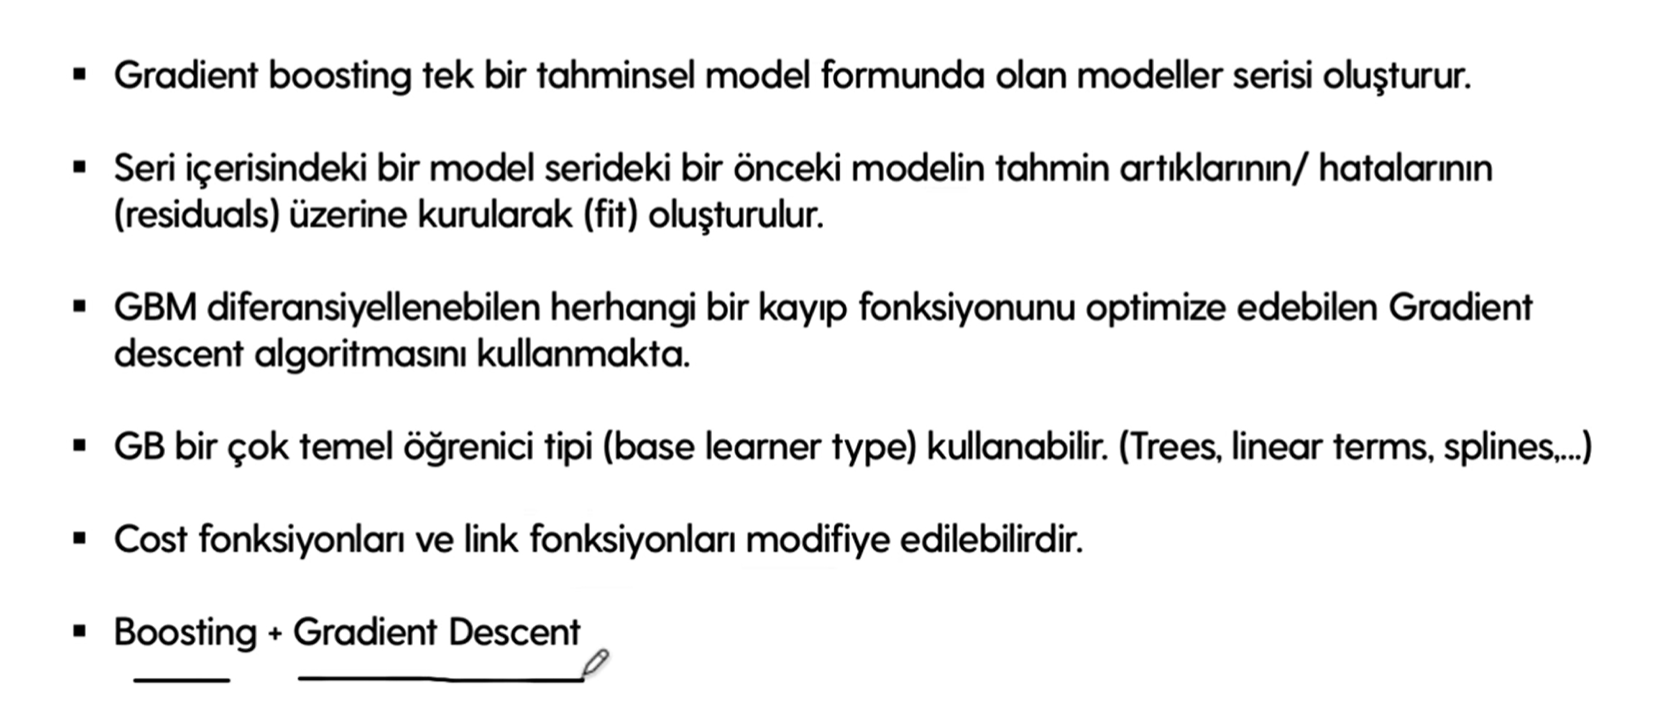

### Gradient Boosting Machines Model ve Tahmin

In [81]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [82]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [83]:
gbm_model

GradientBoostingRegressor()

In [84]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

352.14548197578983

* Yukarıda bulunan predict kısmı bizim ilkel hatamız olarak geçmektedir.

### Model Tuning

In [85]:
?gbm_model

Type:        GradientBoostingRegressor
String form: GradientBoostingRegressor()
Length:      100
File:        c:\users\asus\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for regression.

This estimator builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage a regression tree is fit on the negative gradient of the given
loss function.

:class:`~sklearn.ensemble.HistGradientBoostingRegressor` is a much faster variant
of this algorithm for intermediate and large datasets (`n_samples >= 10_000`) and
supports monotonic constraints.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'squared_error', 'absolute_error', 'huber', 'quantile'},             default='squared_error'
    Loss function to be optimized. 'squared_error' refers to the squared
    error for regression. 'absolute_error' refers to the absolute error of
    regres

In [86]:
gbm_params = {"learning_rate": [0.001, 0.1, 0.01],
             "max_depth": [3, 5, 8],
             "n_estimators": [100, 200, 500],
             "subsample": [1, 0.5, 0.8],
             "loss": ['squared_error', 'absolute_error', 'quantile']}

In [87]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [88]:
gbm_cv_model = GridSearchCV(gbm_model, 
                            gbm_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


In [89]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'absolute_error',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 1}

In [90]:
gbm_model = GradientBoostingRegressor(learning_rate = 0.01, 
                                 loss = 'absolute_error', 
                                 max_depth = 3,
                                 n_estimators = 500,
                                 subsample = 0.5)
gbm_tuned = gbm_model.fit(X_train, y_train)

In [91]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

331.030424349538

### Değişken Önem Düzeyi

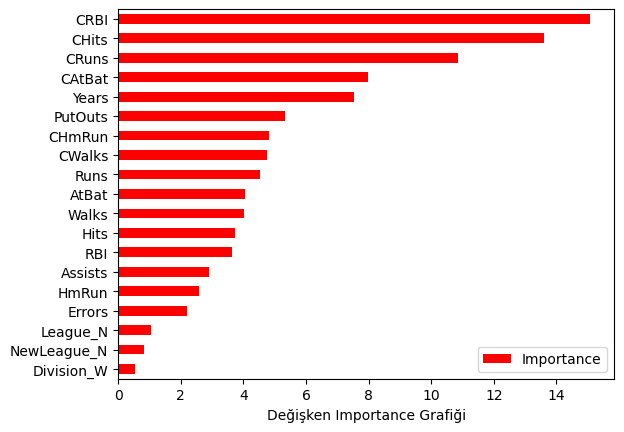

In [92]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100}, 
                         index = X_train.columns)

Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind = "barh", color = "red")
plt.xlabel("Değişken Importance Grafiği")
plt.show()

# eXtreme Gradient Boosting(XGBoost)
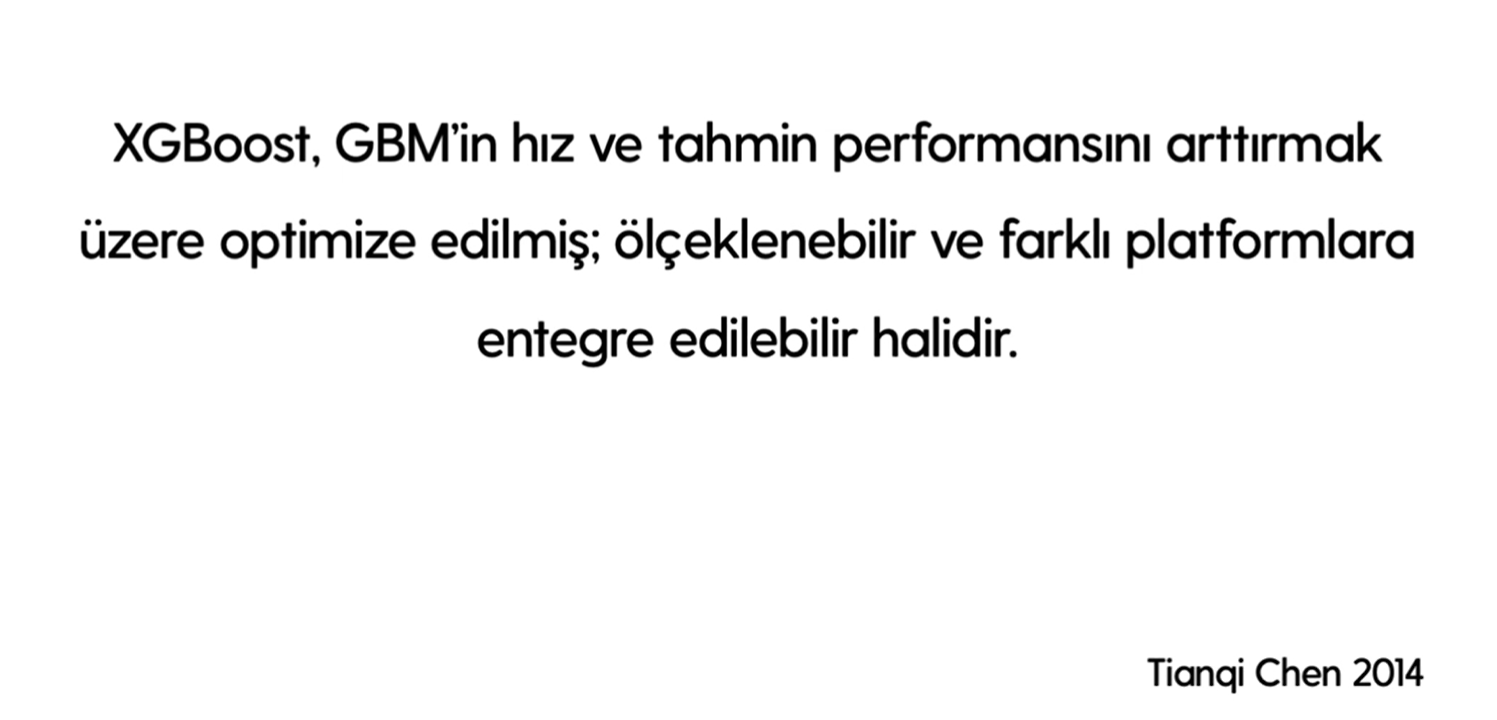

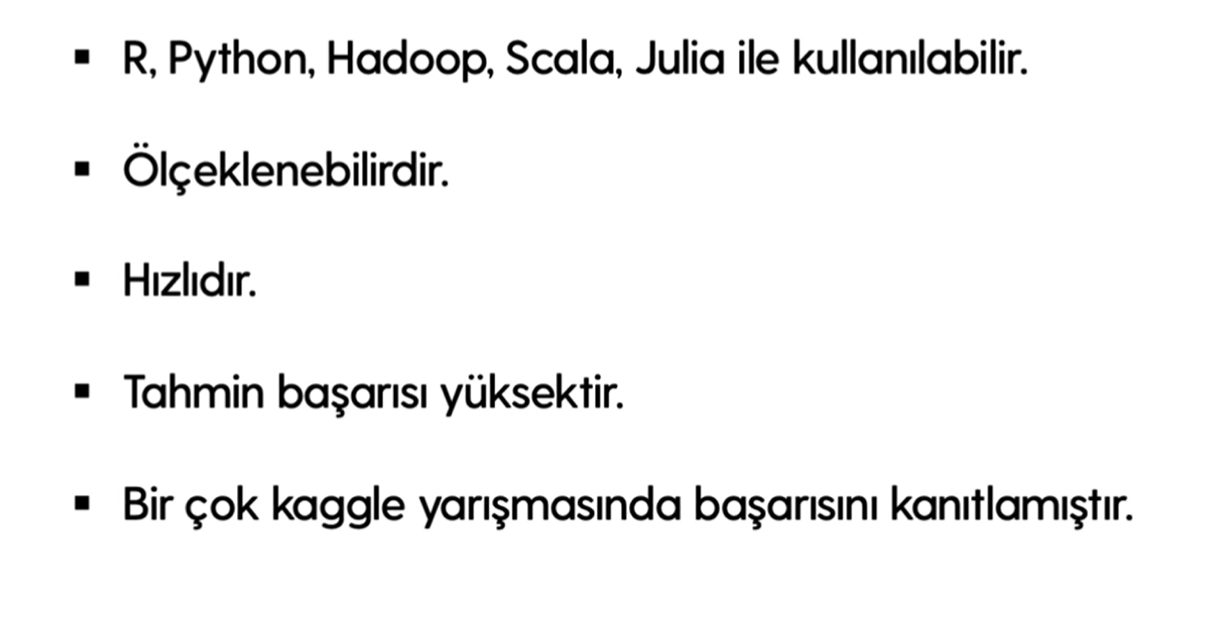

In [93]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

### XGBoost Model ve Tahmin

In [94]:
from xgboost import XGBRegressor 

In [95]:
xgb_model = XGBRegressor().fit(X_train, y_train)

In [96]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [97]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

366.3863437634965

### Model Tuning

In [98]:
?xgb_model

Type:        XGBRegressor
String form:
XGBRegressor(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None,  <...> one, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\asus\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : typing.Optional[int]
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors s

In [99]:
xgb_params = {"learning_rate": [0.1, 0.01, 0.5],
             "max_depth": [2, 3, 4, 5, 8],
             "n_estimators": [100, 200, 500, 1000],
             "colsample_bytree":[0.4, 0.7, 1]}

In [100]:
xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


In [101]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 100}

In [102]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.4,
                        learning_rate = 0.1,
                        max_depth = 5,
                        n_estimators = 100)

In [103]:
xgb_tuned.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [104]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

345.4191388100258

# Light GBM
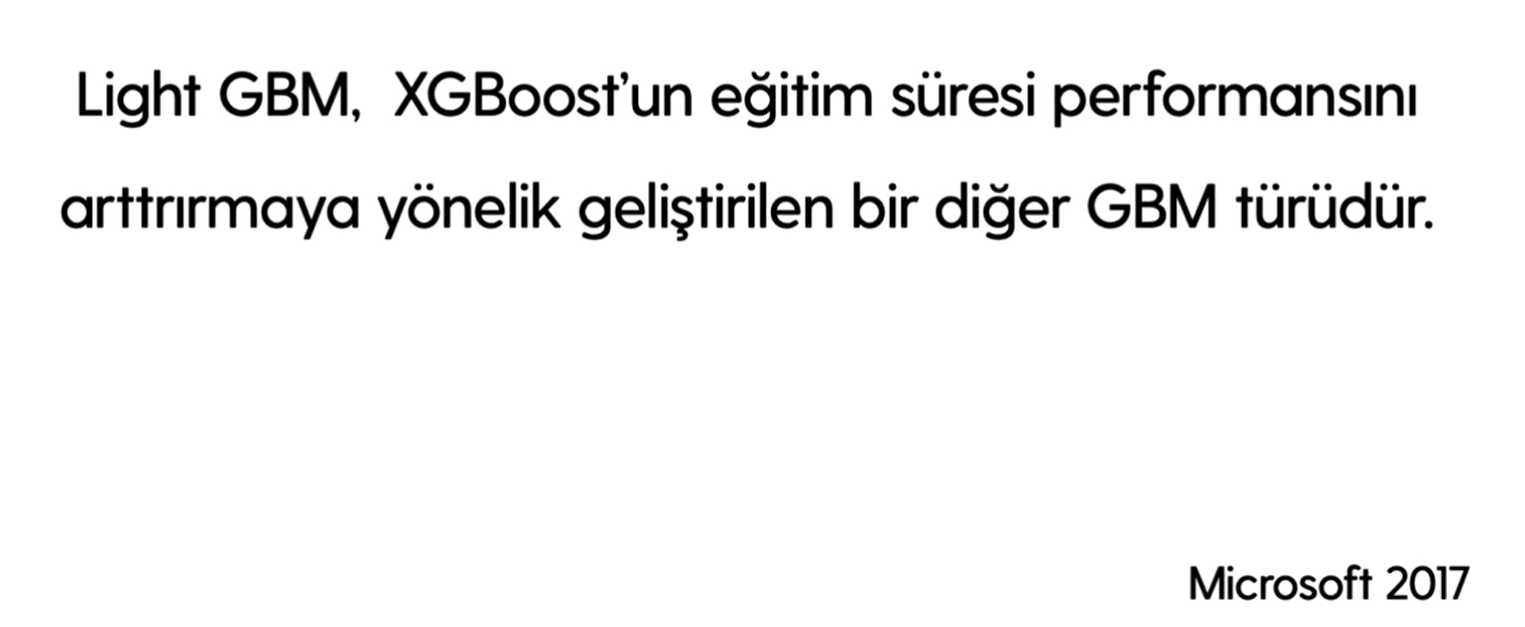

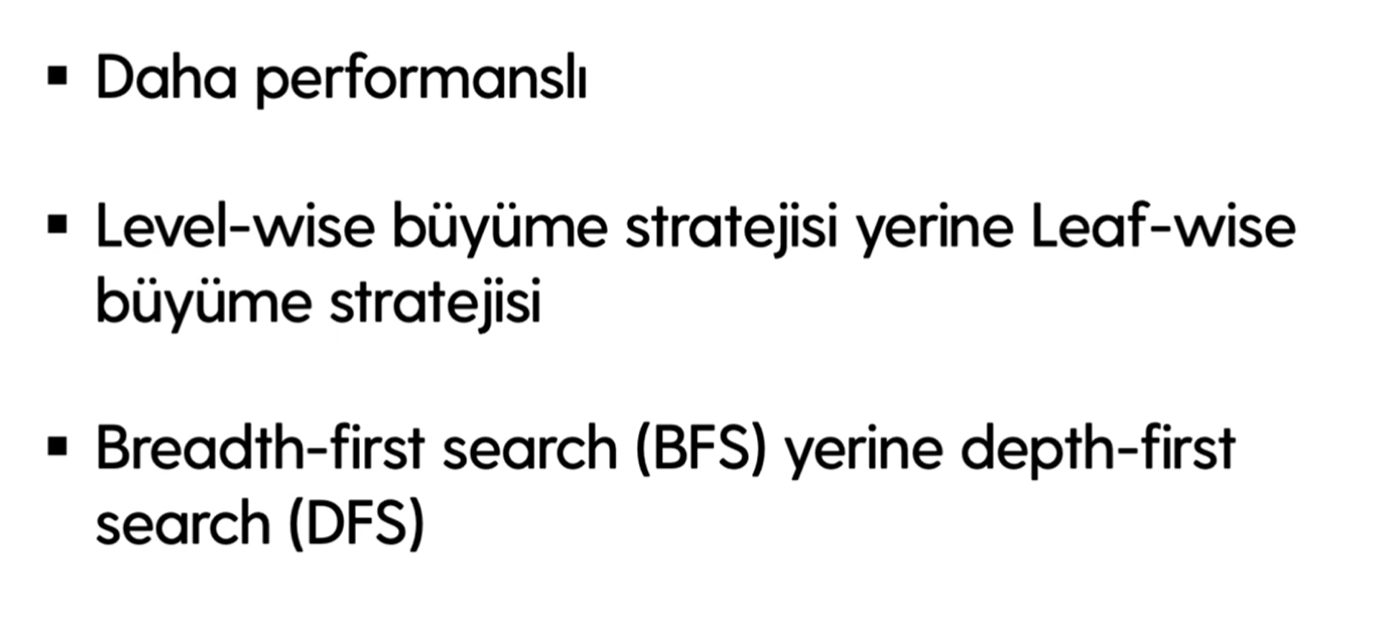

In [105]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

### Model ve Tahmin

In [106]:
from lightgbm import LGBMRegressor

In [107]:
lgb_model = LGBMRegressor()

In [108]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMRegressor()

In [109]:
y_pred = lgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

363.8712087611089

### Model Tuning

In [110]:
?lgb_model

Type:           LGBMRegressor
String form:    LGBMRegressor()
File:           c:\users\asus\anaconda3\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM regressor.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
    If setting this to a positive value, consider also changing ``num_leaves`` to ``<= 2^max_depth``.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this will ignore the ``learning_rate`` arg

In [111]:
lgb_param = {"leaning_rate": [0.01, 0.1, 0.5, 1],
            "n_estimators": [20, 40, 100, 200, 500, 1000],
            "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [112]:
lgb_cv_model = GridSearchCV(lgb_model, lgb_param, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[LightGBM] [Warning] Unknown parameter: leaning_rate
[LightGBM] [Warning] Unknown parameter: leaning_rate
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [113]:
lgb_cv_model.best_params_

{'leaning_rate': 0.01, 'max_depth': 6, 'n_estimators': 20}

In [114]:
lgb_tuned = LGBMRegressor(learning_rate = 0.01, 
                          max_depth = 6, 
                          n_estimators = 20).fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000097 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [115]:
y_pred = lgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

432.1132855723854

# Category Boosting(CatBoost)
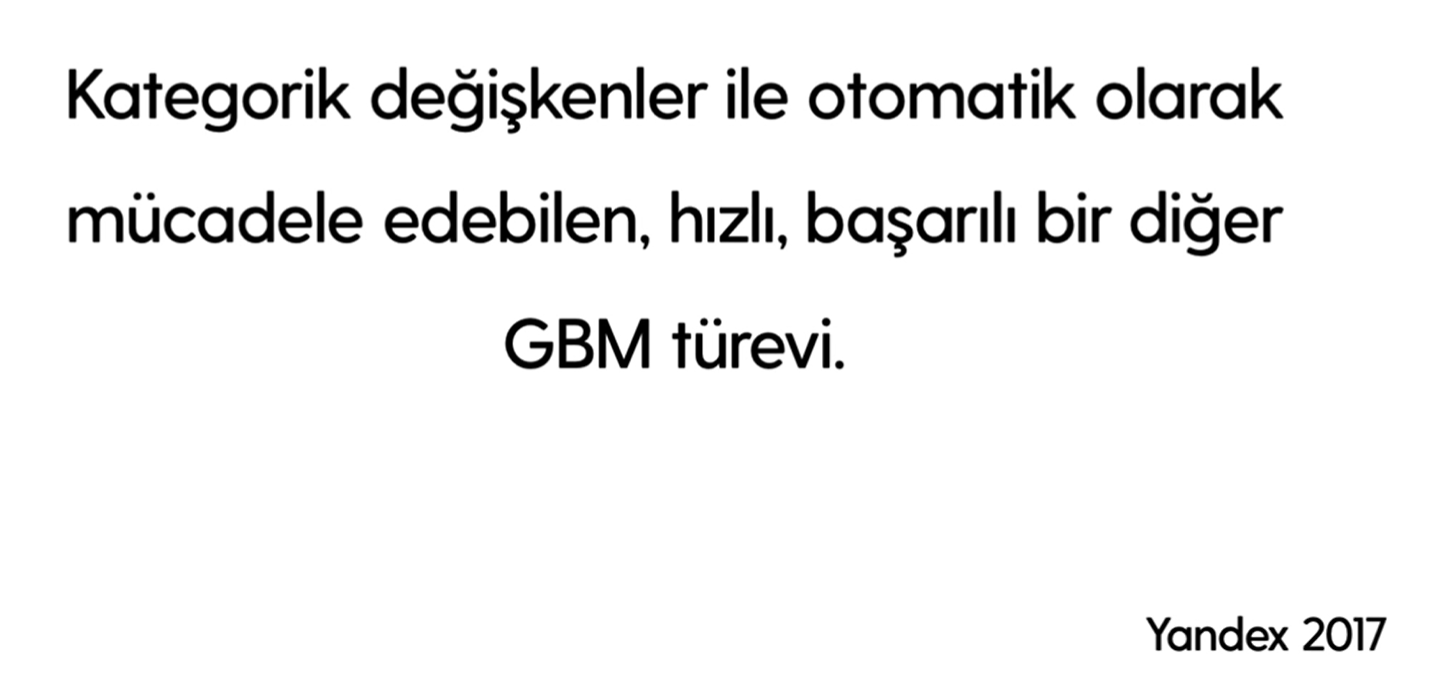

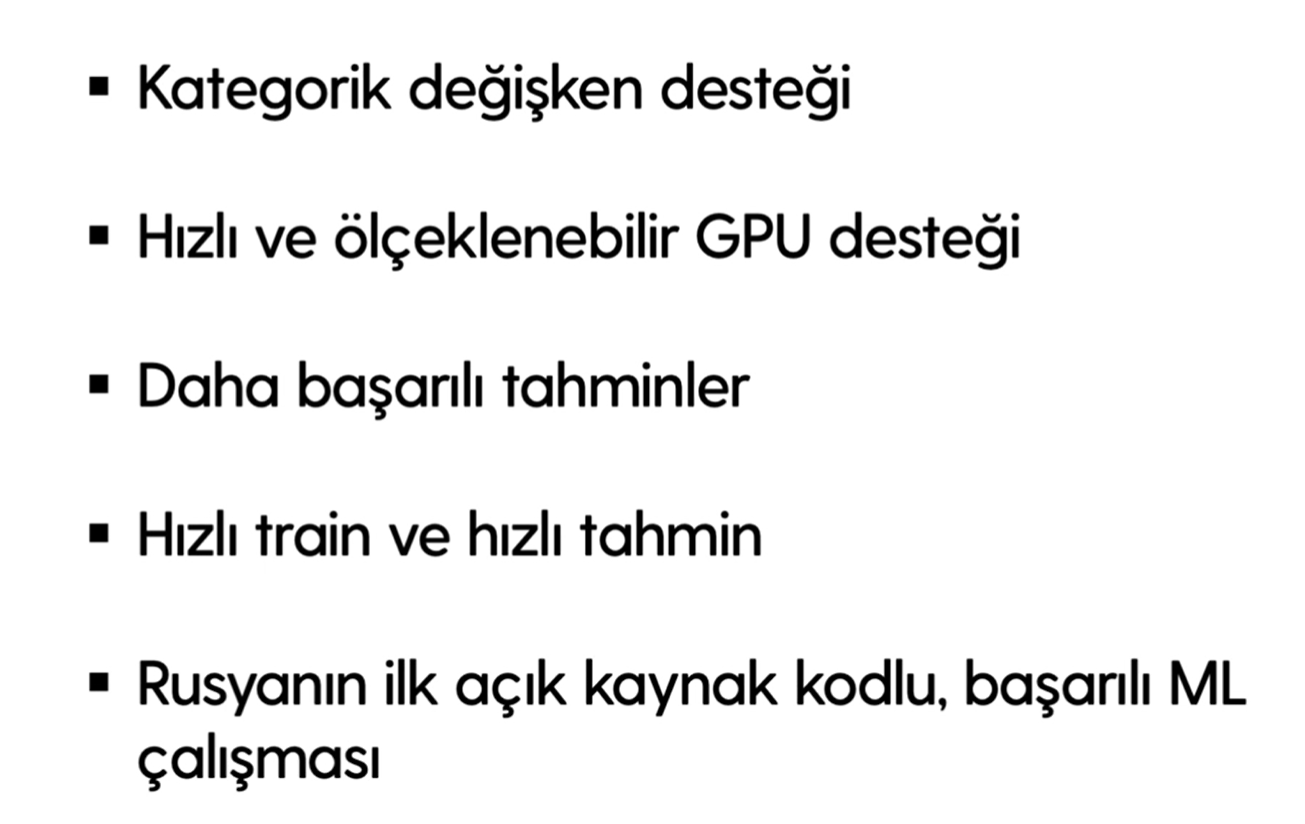

In [116]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

### Model ve Tahmin

In [117]:
!pip install catboost

In [118]:
from catboost import CatBoostRegressor

In [119]:
catb_model = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 147ms	remaining: 2m 27s
1:	learn: 431.3923642	total: 148ms	remaining: 1m 13s
2:	learn: 424.8820360	total: 149ms	remaining: 49.5s
3:	learn: 418.2514904	total: 150ms	remaining: 37.3s
4:	learn: 412.6394021	total: 151ms	remaining: 30s
5:	learn: 406.6247020	total: 152ms	remaining: 25.1s
6:	learn: 400.5321206	total: 153ms	remaining: 21.7s
7:	learn: 394.6683437	total: 154ms	remaining: 19s
8:	learn: 388.2496484	total: 154ms	remaining: 17s
9:	learn: 382.9448842	total: 155ms	remaining: 15.4s
10:	learn: 377.2600080	total: 156ms	remaining: 14.1s
11:	learn: 372.4829606	total: 158ms	remaining: 13s
12:	learn: 366.6823437	total: 159ms	remaining: 12.1s
13:	learn: 362.6076230	total: 160ms	remaining: 11.3s
14:	learn: 358.0107745	total: 161ms	remaining: 10.6s
15:	learn: 353.2802665	total: 162ms	remaining: 9.97s
16:	learn: 348.5646265	total: 163ms	remaining: 9.43s
17:	learn: 343.6407912	total: 164ms	remaining: 8.95s
18:	learn: 339.2363847	total: 16

In [120]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.194631344607

### Model Tuning

In [121]:
catb_params = {"iterations": [200, 500, 1000],
              "learning_rate": [0.01, 0.1],
              "depth": [3,6,8]}

In [122]:
catb_cv_model = GridSearchCV(catb_model, catb_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 425.7900818	total: 955us	remaining: 190ms
1:	learn: 404.8723520	total: 1.85ms	remaining: 183ms
2:	learn: 387.4057666	total: 2.22ms	remaining: 146ms
3:	learn: 372.2801584	total: 2.65ms	remaining: 130ms
4:	learn: 358.9204229	total: 3.08ms	remaining: 120ms
5:	learn: 347.0083933	total: 3.45ms	remaining: 112ms
6:	learn: 336.0130818	total: 3.94ms	remaining: 109ms
7:	learn: 324.3923300	total: 4.35ms	remaining: 104ms
8:	learn: 314.8690957	total: 4.76ms	remaining: 101ms
9:	learn: 308.5075563	total: 5.19ms	remaining: 98.6ms
10:	learn: 298.8587285	total: 5.53ms	remaining: 95.1ms
11:	learn: 294.7655438	total: 5.89ms	remaining: 92.3ms
12:	learn: 288.0697862	total: 6.26ms	remaining: 90.1ms
13:	learn: 282.6697154	total: 6.62ms	remaining: 88ms
14:	learn: 277.6121667	total: 6.99ms	remaining: 86.2ms
15:	learn: 273.4383979	total: 7.36ms	remaining: 84.6ms
16:	learn: 269.1556201	total: 7.73ms	remaining: 83.2ms
17:	learn: 264.8098704	tot

In [123]:
catb_cv_model.best_params_

{'depth': 3, 'iterations': 200, 'learning_rate': 0.1}

In [124]:
catb_tuned = CatBoostRegressor(depth = 3, iterations = 200, learning_rate = 0.1).fit(X_train, y_train)

0:	learn: 425.7900818	total: 1.73ms	remaining: 345ms
1:	learn: 404.8723520	total: 5.36ms	remaining: 530ms
2:	learn: 387.4057666	total: 6.46ms	remaining: 424ms
3:	learn: 372.2801584	total: 7.37ms	remaining: 361ms
4:	learn: 358.9204229	total: 8.46ms	remaining: 330ms
5:	learn: 347.0083933	total: 11.2ms	remaining: 361ms
6:	learn: 336.0130818	total: 12.5ms	remaining: 344ms
7:	learn: 324.3923300	total: 13ms	remaining: 312ms
8:	learn: 314.8690957	total: 13.9ms	remaining: 295ms
9:	learn: 308.5075563	total: 14.3ms	remaining: 272ms
10:	learn: 298.8587285	total: 14.8ms	remaining: 254ms
11:	learn: 294.7655438	total: 15.3ms	remaining: 240ms
12:	learn: 288.0697862	total: 15.8ms	remaining: 228ms
13:	learn: 282.6697154	total: 16.3ms	remaining: 216ms
14:	learn: 277.6121667	total: 16.8ms	remaining: 208ms
15:	learn: 273.4383979	total: 17.4ms	remaining: 200ms
16:	learn: 269.1556201	total: 18ms	remaining: 194ms
17:	learn: 264.8098704	total: 18.4ms	remaining: 186ms
18:	learn: 261.6700768	total: 18.8ms	remai

In [125]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.3125832615482

# Makine Öğrenmesi Görevlerinin Otomatikleştirilmesi

In [126]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

In [127]:
def ML(df, y, algName):
    # train-test ayrımı
    y = df[y]
    X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
    X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    # Modelleme
    model = algName().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    model_adi = algName.__name__
    print(model_adi, "Modelinin Test Hatası:", RMSE)

In [128]:
ML(df, "Salary", RandomForestRegressor)

RandomForestRegressor Modelinin Test Hatası: 348.468468121598


In [129]:
ML(df, "Salary", SVR)

SVR Modelinin Test Hatası: 460.0032657244849


In [130]:
models = [XGBRegressor, 
         GradientBoostingRegressor,
         RandomForestRegressor,
         DecisionTreeRegressor,
         MLPRegressor,
         KNeighborsRegressor,
         SVR]

In [131]:
for i in models:
    ML(df, "Salary", i)

XGBRegressor Modelinin Test Hatası: 366.3863437634965
GradientBoostingRegressor Modelinin Test Hatası: 351.77416111513435
RandomForestRegressor Modelinin Test Hatası: 339.7098446707326
DecisionTreeRegressor Modelinin Test Hatası: 532.4953999460579
MLPRegressor Modelinin Test Hatası: 448.0646538730304
KNeighborsRegressor Modelinin Test Hatası: 426.6570764525201
SVR Modelinin Test Hatası: 460.0032657244849


# **Done**